# Evolution of Agriculture - Inputs, Environmental Impacts & Outputs


## Introduction :
World population is growing as never before and it is no secret. This increase has been made possible thanks to the progress that technologies have brought in the agriculture domain. The modern agriculture use lot of useful tools whether it is machinery, fertilizers, chemical pesticides, and so on. They made the humans able to harvest bigger areas, being more efficient, deal with illnesses and parasites, keep the food consumable longer.. Those revolution drastically changed the agriculture habits. Of course, progresses often have drawbacks and modern agriculture isn't exempted. One of the most common example is the increase in gas emissions. On the following graph, one can see the evolution of the global population and the evolution of gas emissions due to agriculture.


In [1]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
import json
import geopandas as gpd
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [2]:
# Population evolution
population = pd.read_csv('data/population.csv',sep=',',encoding='latin-1')
population = population[population.Element == 'Total Population - Both sexes']
world_pop = population[population.Country == 'World']
world_pop = world_pop.sort_values('Year')

In [3]:
# Emissions
emissions = pd.read_csv('data/Emissions_AllAgriculture.csv',sep=',',encoding='latin-1')
#emissions.set_index('Year', inplace=True)
emissions.drop(['Domain', 'Area Code', 'Area', 'Item Code', 'Item', 'Element', 'Element Code', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note'], axis=1, inplace=True)
emissions_total = emissions.groupby('Year').sum()
emissions_total.reset_index(inplace=True)

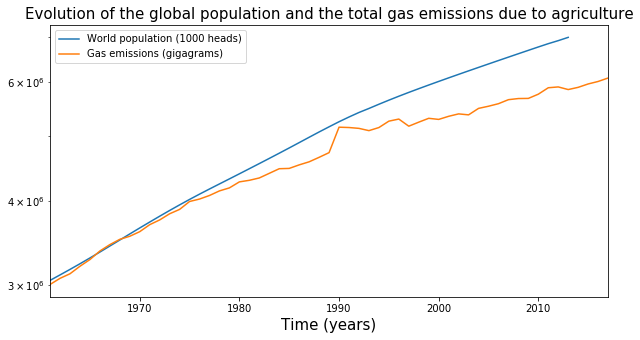

In [4]:
# Visualize the population growth, the production of food and their ratio
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,1,1)

world_pop.plot('Year', 'Value', logy=True, ax=ax1)
emissions_total.plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Evolution of the global population and the total gas emissions due to agriculture', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.legend(['World population (1000 heads)', 'Gas emissions (gigagrams)'])
ax1.grid(axis='y', alpha=0.75)


One must be aware to check the units: The two curves don't represent the same thing here. However, the conclusion is that the gas emissions due to agriculture is roughly increasing collinearly with the global population until now. This is no good prediction for the future as we already feel the environmental consequences of our way of life. To have better clues on the topic, let's study more deeply the relationships between food production, use of fertilizers and environmental impact.

The datasets that are used in this study come from the Food and Agriculture Organization of the United Nations (FAO) website www.fao.org/home/fr/.

After studying the evolution of the food production across the last decades, we will focus on the fertilizers use and the emissions of gaz due to agriculture.

## Part 1: The food production

As a starting point, let's study the current world distribution of food production. Food production can be divided into several subsets, such as meat production, fruits/vegetables production, cereals production... To draw a global vision of the topic, let's study different big classes of food.  

#### 1) Meat production

In [98]:
# Opening database
df_livestock_prim = pd.read_csv('data/Production_LivestockPrimary_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')

To study the evolution of the quantity of meat production, we will use a dataset from the FAO database. We will first take a look at its structure. 

In [99]:
# Visualizing the first dataframe
livestock = df_livestock_prim.copy()
livestock.head()

Area Code         Area  Item Code                 Item  Element Code  \
0          2  Afghanistan       1062  Eggs, hen, in shell          5313   
1          2  Afghanistan       1062  Eggs, hen, in shell          5313   
2          2  Afghanistan       1062  Eggs, hen, in shell          5313   
3          2  Afghanistan       1062  Eggs, hen, in shell          5313   
4          2  Afghanistan       1062  Eggs, hen, in shell          5313   

  Element  Year Code  Year       Unit   Value Flag  
0  Laying       1961  1961  1000 Head  4000.0    F  
1  Laying       1962  1962  1000 Head  4400.0    F  
2  Laying       1963  1963  1000 Head  4600.0    F  
3  Laying       1964  1964  1000 Head  4800.0    F  
4  Laying       1965  1965  1000 Head  5200.0    F

This dataframe contains information about the production of meat, eggs and milk products. It also contains several code that helps to refer to certain class of food. The items are already grouped by bigger families in the dataset. The 3 families we will keep on studying are  *Meat, Total* (item 1765), *Milk, Total* (item 1780) and *Eggs Primary* (item 1783). We only keep the production of those types of food.

In [100]:
# Keep only the meat, the eggs and the milk products
items = [1765, 1780, 1783]
livestock = livestock[livestock['Item Code'].isin(items)]

# Keep only the production
livestock_prod = livestock[livestock.Element == 'Production']

In [101]:
# Check if they are missing values
print("Missing values in livestock_prod:", livestock_prod.isnull().sum().sum())

Missing values in livestock_prod: 100


In [102]:
# Check that we have the same unit for similar products
print("Unit for the meat production:", livestock_prod[livestock_prod.Item == 'Meat, Total'].Unit.unique())
print("Unit for the eggs production:", livestock_prod[livestock_prod.Item == 'Eggs Primary'].Unit.unique())
print("Unit for the milk production:", livestock_prod[livestock_prod.Item == 'Milk,Total'].Unit.unique())

Unit for the meat production: ['tonnes']
Unit for the eggs production: ['tonnes']
Unit for the milk production: ['tonnes']


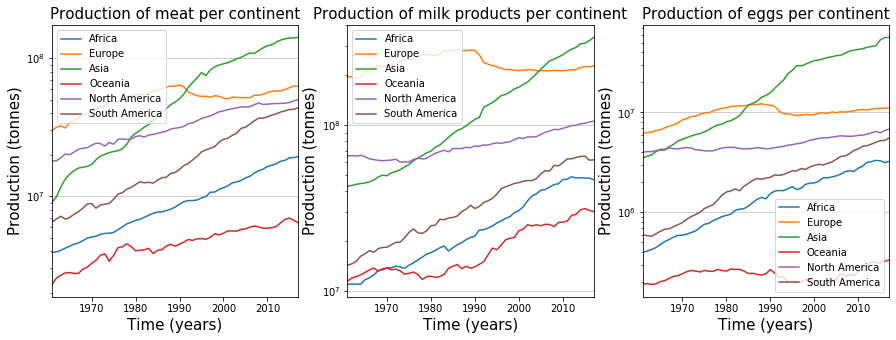

In [103]:
# Visualisation of the evolution of the quantity of livestocks per continent

def select_area(production, area):
    df = production[production.Area == area]
    meat = df[df['Item Code'] == 1765]
    milk = df[df['Item Code'] == 1780]
    eggs = df[df['Item Code'] == 1783]
    return  meat, milk, eggs

afr_meat, afr_milk, afr_eggs = select_area(livestock_prod, 'Africa')
eu_meat, eu_milk, eu_eggs   = select_area(livestock_prod, 'Europe')
as_meat, as_milk, as_eggs   = select_area(livestock_prod, 'Asia')
oc_meat, oc_milk, oc_eggs   = select_area(livestock_prod, 'Oceania')
nam_meat, nam_milk, nam_eggs = select_area(livestock_prod, 'Northern America')
sam_meat, sam_milk, sam_eggs = select_area(livestock_prod, 'South America')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1,3,1)

# Production of meat
afr_meat.plot('Year', 'Value', logy=True, ax=ax1)
eu_meat.plot('Year', 'Value', logy=True, ax=ax1)
as_meat.plot('Year', 'Value', logy=True, ax=ax1)
oc_meat.plot('Year', 'Value', logy=True, ax=ax1)
nam_meat.plot('Year', 'Value', logy=True, ax=ax1)
sam_meat.plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Production of meat per continent', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.set_ylabel('Production (tonnes)', fontsize=15)
ax1.legend(['Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'South America'])
ax1.grid(axis='y', alpha=0.75)

ax2 = fig.add_subplot(1,3,2)

# Yield of milk products
afr_milk.plot('Year', 'Value', logy=True, ax=ax2)
eu_milk.plot('Year', 'Value', logy=True, ax=ax2)
as_milk.plot('Year', 'Value', logy=True, ax=ax2)
oc_milk.plot('Year', 'Value', logy=True, ax=ax2)
nam_milk.plot('Year', 'Value', logy=True, ax=ax2)
sam_milk.plot('Year', 'Value', logy=True, ax=ax2)
ax2.set_title('Production of milk products per continent', fontsize=15)
ax2.set_xlabel('Time (years)', fontsize=15)
ax2.set_ylabel('Production (tonnes)', fontsize=15)
ax2.legend(['Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'South America'])
ax2.grid(axis='y', alpha=0.75)

ax3 = fig.add_subplot(1,3,3)

# Yield of eggs
afr_eggs.plot('Year', 'Value', logy=True, ax=ax3)
eu_eggs.plot('Year', 'Value', logy=True, ax=ax3)
as_eggs.plot('Year', 'Value', logy=True, ax=ax3)
oc_eggs.plot('Year', 'Value', logy=True, ax=ax3)
nam_eggs.plot('Year', 'Value', logy=True, ax=ax3)
sam_eggs.plot('Year', 'Value', logy=True, ax=ax3)
ax3.set_title('Production of eggs per continent', fontsize=15)
ax3.set_xlabel('Time (years)', fontsize=15)
ax3.set_ylabel('Production (tonnes)', fontsize=15)
ax3.legend(['Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'South America'])
ax3.grid(axis='y', alpha=0.75)

The global evolution is increasing as expected. It seems that we have a missing value for the meat production at the year 2018. 
Let's try to visualize those graphs on a folium map. First, let's take a look at the distribution of the values.

Text(0.5, 1.0, 'Distribution of the values taken in livestock_prod')

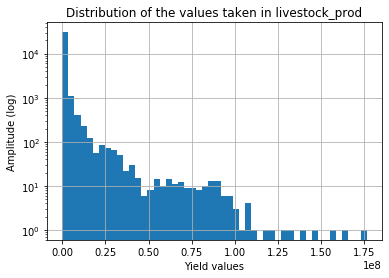

In [104]:
# We now want to study the stocks for each country
livestock_country = livestock_prod[livestock_prod['Area Code'] < 5000] # to get rid of the groups such as the continents

# Plot the distribution of the values taken in the row 'Value'
livestock_country.Value.hist(bins = 50, log=True)
plt.xlabel('Yield values')
plt.ylabel('Amplitude (log)')
plt.title('Distribution of the values taken in livestock_prod')

A logarithm scale seems appropriated for this case.

In [105]:
# Create a new column with the log value of each stock value
livestock_country['Log Value'] = livestock_country.Value.transform(lambda x:round(np.log(x)).astype(int))
livestock_country['Log Value'] = livestock_country['Log Value'].replace(-np.inf, 0)

/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now, we have to prepare the map with our json file 'countries.json'.

In [13]:
# Preparing the map
json_file = pd.read_json("countries.json")
df_json = pd.DataFrame({'Area': json_file['name'], 'id': json_file['cca3']})
df_json.head()

Area   id
0  {'common': 'Aruba', 'official': 'Aruba', 'nati...  ABW
1  {'common': 'Afghanistan', 'official': 'Islamic...  AFG
2  {'common': 'Angola', 'official': 'Republic of ...  AGO
3  {'common': 'Anguilla', 'official': 'Anguilla',...  AIA
4  {'common': 'Åland Islands', 'official': 'Åland...  ALA

In [14]:
# Change the format for the name column by taking the common name of each country
def name_json(df):
    df_size = len(df)
    for i in range(df_size):
        df.Area[i] = df.Area[i]['common'][0:len(df.Area[i]['common'])]
    return df

df_json = name_json(df_json)
df_json.head()

Area   id
0          Aruba  ABW
1    Afghanistan  AFG
2         Angola  AGO
3       Anguilla  AIA
4  Åland Islands  ALA

In [15]:
# Dealing with the different ways to call a same country
def replace_values_area(df):
    df[df.Area == 'United States'] = df[df.Area == 'United States'].replace('United States', 'United States of America')
    df[df.Area == 'Russia'] = df[df.Area == 'Russia'].replace('Russia', 'Russian Federation')
    df[df.Area == 'Bolivia'] = df[df.Area == 'Bolivia'].replace('Bolivia', 'Bolivia (Plurinational State of)')
    df[df.Area == 'Venezuela'] = df[df.Area == 'Venezuela'].replace('Venezuela', 'Venezuela (Bolivarian Republic of)')
    df[df.Area == 'Ivory Coast'] = df[df.Area == 'Ivory Coast'].replace('Ivory Coast', 'Côte d\'Ivoire')
    df[df.Area == 'DR Congo'] = df[df.Area == 'DR Congo'].replace('DR Congo', 'Democratic Republic of the Congo')
    df[df.Area == 'Republic of the Congo'] = df[df.Area == 'Republic of the Congo'].replace('Republic of the Congo', 'Congo')   
    df[df.Area == 'Moldova'] = df[df.Area == 'Moldova'].replace('Moldova', 'Republic of Moldova')
    df[df.Area == 'Syria'] = df[df.Area == 'Syria'].replace('Syria', 'Syrian Arab Republic')
    df[df.Area == 'Iran'] = df[df.Area == 'Iran'].replace('Iran', 'Iran (Islamic Republic of)')
    df[df.Area == 'Vietnam'] = df[df.Area == 'Vietnam'].replace('Vietnam', 'Viet Nam')
    df[df.Area == 'Laos'] = df[df.Area == 'Laos'].replace('Laos', 'Lao People\'s Democratic Republic')
    df[df.Area == 'North Korea'] = df[df.Area == 'North Korea'].replace('North Korea', 'Democratic People\'s Republic of Korea')
    df[df.Area == 'South Korea'] = df[df.Area == 'South Korea'].replace('South Korea', 'Republic of Korea')
    df[df.Area == 'Tanzania'] = df[df.Area == 'Tanzania'].replace('Tanzania', 'United Republic of Tanzania')
    df[df.Area == 'Taiwan'] = df[df.Area == 'Taiwan'].replace('Taiwan', 'China, Taiwan Province of')
    df[df.Area == 'Brunei'] = df[df.Area == 'Brunei'].replace('Brunei', 'Brunei Darussalam')
    return(df)

df_json = replace_values_area(df_json)

In [16]:
# Merge the df_json dataframe to our initial dataframe
# They will have the right id for each country
livestock_country = livestock_country.merge(df_json, on='Area', how='inner')
livestock_country.head()

Area Code         Area  Item Code          Item  Element Code     Element  \
0          2  Afghanistan       1783  Eggs Primary          5510  Production   
1          2  Afghanistan       1783  Eggs Primary          5510  Production   
2          2  Afghanistan       1783  Eggs Primary          5510  Production   
3          2  Afghanistan       1783  Eggs Primary          5510  Production   
4          2  Afghanistan       1783  Eggs Primary          5510  Production   

   Year Code  Year    Unit    Value Flag  Log Value   id  
0       1961  1961  tonnes  10000.0    A        9.0  AFG  
1       1962  1962  tonnes  11000.0    A        9.0  AFG  
2       1963  1963  tonnes  11500.0    A        9.0  AFG  
3       1964  1964  tonnes  12000.0    A        9.0  AFG  
4       1965  1965  tonnes  12800.0    A        9.0  AFG

In [17]:
# Example : Production of milk in 2000
map1 = folium.Map(location=[0,0], zoom_start=1)

state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)

data = livestock_country[livestock_country.Year == 2000]
data_meat = data[data['Item Code'] == 1765]
data_milk = data[data['Item Code'] == 1780]
data_eggs = data[data['Item Code'] == 1783]

folium.Choropleth(geo_data=geo_json_data, data=data_meat,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='Oranges', fill_opacity=1, line_opacity=0.2,
             legend_name='Logarithm Production of meat (tonnes)',
             control=True, name='Meat Production', show=True, overlay=False).add_to(map1)

folium.Choropleth(geo_data=geo_json_data, data=data_milk,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='Oranges', fill_opacity=1, line_opacity=0.2,
             legend_name='Logarithm Production of milk (tonnes)',
             control=True, name = 'Milk Production', show=False , overlay=False).add_to(map1)

folium.Choropleth(geo_data=geo_json_data, data=data_eggs,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='Oranges', fill_opacity=1, line_opacity=0.2,
             legend_name='Logarithm Production of eggs (tonnes)',
             control=True, name = 'Eggs Production', show=False , overlay=False).add_to(map1)

#map1.add_child 
folium.LayerControl().add_to(map1)
map1.save('livestock_prim_production_2000.html')
map1

In [234]:
def replace_values_geojson(df):
    #df[df.sov_a3 == 'United States'] = df[df.sov_a3 == 'United States'].replace('United States', 'United States of America')
    df[df.Area == 'Russian Federation'] = df[df.Area == 'Russian Federation'].replace('Russian Federation', 'Russia')
    df[df.Area == 'Bolivia (Plurinational State of)'] = df[df.Area == 'Bolivia (Plurinational State of)'].replace('Bolivia (Plurinational State of)', 'Bolivia')
    # Peut etre avec des parenthèses
    df[df.Area == 'Venezuela (Bolivarian Republic of)'] = df[df.Area == 'Venezuela (Bolivarian Republic of)'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
    df[df.Area == 'Côte d\'Ivoire'] = df[df.Area == 'Côte d\'Ivoire'].replace('Côte d\'Ivoire', 'Ivory Coast')
    #df[df.sov_a3 == 'DR Congo'] = df[df.sov_a3 == 'DR Congo'].replace('DR Congo', 'Democratic Republic of the Congo')
    df[df.Area == 'Congo'] = df[df.Area == 'Congo'].replace('Congo', 'Republic of the Congo')   
    df[df.Area == 'Republic of Moldova'] = df[df.Area == 'Republic of Moldova'].replace('Republic of Moldova', 'Moldova')
    df[df.Area == 'Syrian Arab Republic'] = df[df.Area == 'Syrian Arab Republic'].replace('Syrian Arab Republic', 'Syria')
    df[df.Area == 'Iran (Islamic Republic of)'] = df[df.Area == 'Iran (Islamic Republic of)'].replace('Iran (Islamic Republic of)', 'Iran')
    df[df.Area == 'Viet Nam'] = df[df.Area == 'Viet Nam'].replace('Viet Nam', 'Vietnam')
    df[df.Area == 'Lao People\'s Democratic Republic'] = df[df.Area == 'Lao People\'s Democratic Republic'].replace('Lao People\'s Democratic Republic', 'Laos')
    df[df.Area == 'Democratic People\'s Republic of Korea'] = df[df.Area == 'Democratic People\'s Republic of Korea'].replace('Democratic People\'s Republic of Korea', 'North Korea')
    df[df.Area == 'Republic of Korea'] = df[df.Area == 'Republic of Korea'].replace('Republic of Korea', 'South Korea')
    # df[df.sov_a3 == 'Tanzania'] = df[df.sov_a3 == 'Tanzania'].replace('Tanzania', 'United Republic of Tanzania')
    df[df.Area == 'Serbia'] = df[df.Area == 'Serbia'].replace('Serbia', 'Republic of Serbia')
    df[df.Area == 'The former Yugoslav Republic of Macedonia'] = df[df.Area == 'The former Yugoslav Republic of Macedonia'].replace('The former Yugoslav Republic of Macedonia', 'Macedonia')
    df[df.Area == 'China, Taiwan Province of'] = df[df.Area == 'China, Taiwan Province of'].replace('China, Taiwan Province of', 'Taiwan')
    return(df)

livestock_country = replace_values_geojson(livestock_country)
livestock_country.head()

/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/clelie/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Area Code         Area  Item Code          Item  Element Code  \
3653          2  Afghanistan       1783  Eggs Primary          5510   
3654          2  Afghanistan       1783  Eggs Primary          5510   
3655          2  Afghanistan       1783  Eggs Primary          5510   
3656          2  Afghanistan       1783  Eggs Primary          5510   
3657          2  Afghanistan       1783  Eggs Primary          5510   

         Element  Year Code  Year    Unit    Value Flag  Log Value  
3653  Production       1961  1961  tonnes  10000.0    A          9  
3654  Production       1962  1962  tonnes  11000.0    A          9  
3655  Production       1963  1963  tonnes  11500.0    A          9  
3656  Production       1964  1964  tonnes  12000.0    A          9  
3657  Production       1965  1965  tonnes  12800.0    A          9

# Time maps cette fois ca va marcher

In [235]:
# Preparing the map
json_file = pd.read_json("countries.geo.json")
df_json = pd.DataFrame({'features': json_file['features']})
df_json.head()

features
0  {'type': 'Feature', 'id': 'AFG', 'properties':...
1  {'type': 'Feature', 'id': 'AGO', 'properties':...
2  {'type': 'Feature', 'id': 'ALB', 'properties':...
3  {'type': 'Feature', 'id': 'ARE', 'properties':...
4  {'type': 'Feature', 'id': 'ARG', 'properties':...

In [236]:
# Change the format for the name column by taking the common name of each country
def name_json(df):
    df_size = len(df)
    df['id']=''
    df['Area']=''
    for i in range(df_size):
        df['id'][i] = df.features[i]['id'][0:len(df.features[i]['id'])]
        df['Area'][i] = df.features[i]['properties']['name'][0:len(df.features[i]['properties']['name'])]
    df.drop('features', axis=1, inplace=True)
    return df

df_json = name_json(df_json)
df_json.head()

id                  Area
0  AFG           Afghanistan
1  AGO                Angola
2  ALB               Albania
3  ARE  United Arab Emirates
4  ARG             Argentina

In [237]:
#df_id = df_json.drop(df_states.columns[~df_states.columns.isin(["id", 'Area'])], axis=1)

livestock = livestock_country.merge(df_json, on='Area')
meat = livestock[livestock['Item Code'] == 1765]
meat.drop_duplicates(inplace=True)
#meat.drop(['Area Code', 'Area', 'Item', 'Item Code', 'Element', 'Element Code', 'Year Code', 'Unit', 'Value', 'Flag'], axis=1, inplace=True)
df=df_json
df.to_pickle('df_json')
meat.head(1)

/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Area Code         Area  Item Code         Item  Element Code     Element  \
57          2  Afghanistan       1765  Meat, Total          5510  Production   

    Year Code  Year    Unit     Value Flag  Log Value   id  
57       1961  1961  tonnes  129420.0    A         12  AFG

In [238]:
meat.drop(['Area Code', 'Area', 'Item', 'Item Code', 'Element', 'Element Code', 'Year Code', 'Unit', 'Value', 'Flag'], axis=1, inplace=True)
meat[meat.Year == 1961].shape

/home/clelie/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(138, 3)

In [239]:
meat[meat.Year == 1961].id.shape

(138,)

In [240]:
#df = pd.read_pickle('df_json')
test = df.copy()
test.id.unique().shape
#j.size

(178,)

In [215]:
test.drop(['Log Value_x', 'Log Value_y'], axis=1, inplace=True)
test.head()

id                  Area  Meat 1961  Meat 1962  Meat 1963  Meat 1964  \
0  AFG           Afghanistan       12.0       12.0       12.0       12.0   
1  AGO                Angola       10.0       11.0       11.0       11.0   
2  ALB               Albania       10.0       10.0       10.0       10.0   
3  ARE  United Arab Emirates        9.0        9.0        9.0        9.0   
4  ARG             Argentina       15.0       15.0       15.0       15.0   

   Meat 1965  Meat 1966  Meat 1967  Meat 1969  Meat 1968  Meat 1970  
0       12.0       12.0       12.0       12.0       12.0       12.0  
1       11.0       11.0       11.0       11.0       11.0       11.0  
2       10.0       10.0       10.0       10.0       10.0       10.0  
3        9.0        9.0        9.0        9.0        9.0        9.0  
4       15.0       15.0       15.0       15.0       15.0       15.0

In [241]:
years = range (1961, 2017)
for y in years:
    j = meat[meat.Year == y]
    j.drop('Year', axis=1, inplace=True)
    test = test.merge(j, on=['id'], how='left')
    test = test.rename(columns={'Log Value': 'Meat %d'%y})
#j.shape
test.head()

id                  Area  Meat 1961  Meat 1962  Meat 1963  Meat 1964  \
0  AFG           Afghanistan       12.0       12.0       12.0       12.0   
1  AGO                Angola       10.0       11.0       11.0       11.0   
2  ALB               Albania       10.0       10.0       10.0       10.0   
3  ARE  United Arab Emirates        9.0        9.0        9.0        9.0   
4  ARG             Argentina       15.0       15.0       15.0       15.0   

   Meat 1965  Meat 1966  Meat 1967  Meat 1968  ...  Meat 2007  Meat 2008  \
0       12.0       12.0       12.0       12.0  ...       12.0       13.0   
1       11.0       11.0       11.0       11.0  ...       12.0       12.0   
2       10.0       10.0       10.0       10.0  ...       12.0       11.0   
3        9.0        9.0        9.0        9.0  ...       11.0       12.0   
4       15.0       15.0       15.0       15.0  ...       15.0       15.0   

   Meat 2009  Meat 2010  Meat 2011  Meat 2012  Meat 2013  Meat 2014  \
0       13.0       13.0       13.0       13.0       13.0       13.0   
1       12.0       12.0       12.0       12.0       12.0       13.0   
2       11.0       11.0       11.0       11.0       11.0       11.0   
3       12.0       12.0       12.0       12.0       12.0       12.0   
4       15.0       15.0       15.0       15.0       15.0       15.0   

   Meat 2015  Meat 2016  
0       13.0       13.0  
1       13.0       13.0  
2       11.0       11.0  
3       12.0       12.0  
4       16.0       16.0  

[5 rows x 58 columns]

In [206]:
j.drop('Year', axis=1, inplace=True)
j.shape

(127, 2)

In [207]:
test = test.merge(j, on=['id'], how='left')
test.shape

(195, 14)

In [208]:
test = test.rename(columns={'Log Value': 'Meat %d'%y})
test.shape

(195, 14)

In [209]:
test.head()

id                  Area  Meat 1961  Meat 1962  Meat 1963  Meat 1964  \
0  AFG           Afghanistan       12.0       12.0       12.0       12.0   
1  AGO                Angola       10.0       11.0       11.0       11.0   
2  ALB               Albania       10.0       10.0       10.0       10.0   
3  ARE  United Arab Emirates        9.0        9.0        9.0        9.0   
4  ARG             Argentina       15.0       15.0       15.0       15.0   

   Meat 1965  Meat 1966  Meat 1967  Log Value_x  Log Value_y  Meat 1969  \
0       12.0       12.0       12.0          NaN         12.0       12.0   
1       11.0       11.0       11.0          NaN         11.0       11.0   
2       10.0       10.0       10.0          NaN         10.0       10.0   
3        9.0        9.0        9.0          NaN          9.0        9.0   
4       15.0       15.0       15.0          NaN         15.0       15.0   

   Meat 1968  Meat 1970  
0       12.0       12.0  
1       11.0       11.0  
2       10.0       10.0  
3        9.0        9.0  
4       15.0       15.0

In [81]:
y=1967
j = meat[meat.Year == y]
j.drop('Year', axis=1, inplace=True)
df = df.merge(j, on=['id'], how='left')
df = df.rename(columns={'Log Value': 'Meat %d'%y})
df.head(5)


id                  Area  Meat 1967
0  AFG           Afghanistan         12
1  AGO                Angola         11
2  ALB               Albania         10
3  ARE  United Arab Emirates          9
4  ARG             Argentina         15

In [30]:
#Panda avec indices
# Create a dataset containing the columns we need
meat = livestock[livestock['Item Code'] == 1765]
meat.drop(['Area Code', 'Area', 'Item', 'Item Code', 'Element', 'Element Code', 'Year Code', 'Unit', 'Value', 'Flag'], axis=1, inplace=True)
df=df_json
years = range(1961, 1964)
for y in years:
    j = meat[meat.Year == y]
    j.drop('Year', axis=1, inplace=True)
    df = df.merge(j, on=['id'], how='inner')
    df = df.rename(columns={'Log Value': 'Meat %d'%y})

df.head()

KeyError: "['Item CodeElement'] not found in axis"

In [242]:
df_states = gpd.read_file("countries.geo.json")
df_states.drop('name', axis=1, inplace=True)
df_states.head()

id                                           geometry
0  AFG  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1  AGO  POLYGON ((16.32653 -5.87747, 16.57318 -6.62265...
2  ALB  POLYGON ((20.59025 41.85540, 20.46317 41.51509...
3  ARE  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4  ARG  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

In [243]:
final = df_states.merge(test, on=['id'], how='left')
final.head()

id                                           geometry  \
0  AFG  POLYGON ((61.21082 35.65007, 62.23065 35.27066...   
1  AGO  POLYGON ((16.32653 -5.87747, 16.57318 -6.62265...   
2  ALB  POLYGON ((20.59025 41.85540, 20.46317 41.51509...   
3  ARE  POLYGON ((51.57952 24.24550, 51.75744 24.29407...   
4  ARG  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...   

                   Area  Meat 1961  Meat 1962  Meat 1963  Meat 1964  \
0           Afghanistan       12.0       12.0       12.0       12.0   
1                Angola       10.0       11.0       11.0       11.0   
2               Albania       10.0       10.0       10.0       10.0   
3  United Arab Emirates        9.0        9.0        9.0        9.0   
4             Argentina       15.0       15.0       15.0       15.0   

   Meat 1965  Meat 1966  Meat 1967  ...  Meat 2007  Meat 2008  Meat 2009  \
0       12.0       12.0       12.0  ...       12.0       13.0       13.0   
1       11.0       11.0       11.0  ...       12.0       12.0       12.0   
2       10.0       10.0       10.0  ...       12.0       11.0       11.0   
3        9.0        9.0        9.0  ...       11.0       12.0       12.0   
4       15.0       15.0       15.0  ...       15.0       15.0       15.0   

   Meat 2010  Meat 2011  Meat 2012  Meat 2013  Meat 2014  Meat 2015  Meat 2016  
0       13.0       13.0       13.0       13.0       13.0       13.0       13.0  
1       12.0       12.0       12.0       12.0       13.0       13.0       13.0  
2       11.0       11.0       11.0       11.0       11.0       11.0       11.0  
3       12.0       12.0       12.0       12.0       12.0       12.0       12.0  
4       15.0       15.0       15.0       15.0       15.0       16.0       16.0  

[5 rows x 59 columns]

In [41]:
df_states = df_states.rename(columns={'name': 'Area'})
df_id = df_states.drop(df_states.columns[~df_states.columns.isin(["id", 'Area'])], axis=1)

livestock = livestock_country.merge(df_id, on='Area')
meat = livestock[livestock['Item Code'] == 1765]
milk = livestock[livestock['Item Code'] == 1780]

In [62]:
years = range(1961, 2017)

frames_meat = {i:dat for i, dat in meat.groupby('Year')}
frames_milk = {i:dat for i, dat in milk.groupby('Year')}

In [63]:
years = range(2013, 2017)

milk_prod = df_states
for y in years:
    frames_meat[y] = frames_meat[y].drop('Year', axis=1)
    frames_milk[y] = frames_milk[y].drop('Year', axis=1)
    df_states = df_states.merge(frames_meat[y], on="id")
    df_states = df_states.rename(columns={'Log Value': 'Meat %d'%y})
    
    milk_prod = milk_prod.merge(frames_milk[y], on="id")
    milk_prod = df_states.rename(columns={'Log Value': 'Milk %d'%y})

df_states.head()

id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  Meat 2013  Meat 2014  \
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...         13         13   
1  POLYGON ((16.32653 -5.87747, 16.57318 -6.62265...         12         13   
2  POLYGON ((20.59025 41.85540, 20.46317 41.51509...         11         11   
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...         12         12   
4  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...         15         15   

   Meat 2015  Meat 2016  
0         13         13  
1         13         13  
2         11         11  
3         12         12  
4         16         16

In [228]:
test.dropna(inplace=True)

id                              Area  Meat 1961  Meat 1962  Meat 1963  \
0    AFG                       Afghanistan       12.0       12.0       12.0   
1    AGO                            Angola       10.0       11.0       11.0   
2    ALB                           Albania       10.0       10.0       10.0   
3    ARE              United Arab Emirates        9.0        9.0        9.0   
4    ARG                         Argentina       15.0       15.0       15.0   
8    AUS                         Australia       14.0       14.0       14.0   
9    AUS                         Australia       14.0       14.0       14.0   
10   AUT                           Austria       13.0       13.0       13.0   
12   BDI                           Burundi        9.0        9.0        9.0   
14   BEN                             Benin       10.0       10.0       10.0   
15   BFA                      Burkina Faso       11.0       11.0       11.0   
16   BGD                        Bangladesh       12.0       12.0       12.0   
17   BGR                          Bulgaria       13.0       13.0       13.0   
21   BLZ                            Belize        7.0        7.0        7.0   
22   BMU                           Bermuda        5.0        6.0        6.0   
24   BRA                            Brazil       15.0       15.0       15.0   
26   BTN                            Bhutan        8.0        8.0        8.0   
27   BWA                          Botswana       10.0       10.0       10.0   
28   CAF          Central African Republic       10.0       10.0       10.0   
29   CAN                            Canada       14.0       14.0       14.0   
30   CAN                            Canada       14.0       14.0       14.0   
31   CAN                            Canada       14.0       14.0       14.0   
32   CAN                            Canada       14.0       14.0       14.0   
33   CAN                            Canada       14.0       14.0       14.0   
34   CAN                            Canada       14.0       14.0       14.0   
35   CHE                       Switzerland       12.0       12.0       13.0   
36   CHL                             Chile       12.0       12.0       12.0   
37   CHN                             China       15.0       15.0       15.0   
39   CMR                          Cameroon       11.0       11.0       11.0   
40   COD  Democratic Republic of the Congo       12.0       12.0       12.0   
..   ...                               ...        ...        ...        ...   
92   JOR                            Jordan        9.0        9.0        9.0   
93   JPN                             Japan       13.0       14.0       14.0   
94   JPN                             Japan       13.0       14.0       14.0   
96   KEN                             Kenya       12.0       12.0       12.0   
98   KHM                          Cambodia       10.0       10.0       10.0   
101  KWT                            Kuwait        9.0        9.0        9.0   
103  LBN                           Lebanon       11.0       11.0       11.0   
104  LBR                           Liberia        9.0        9.0        9.0   
105  LBY                             Libya       10.0       10.0       10.0   
106  LKA                         Sri Lanka       11.0       11.0       11.0   
107  LSO                           Lesotho       10.0       10.0       10.0   
111  MAR                           Morocco       12.0       12.0       12.0   
113  MDG                        Madagascar       12.0       12.0       12.0   
114  MEX                            Mexico       14.0       14.0       14.0   
116  MLI                              Mali       11.0       11.0       11.0   
117  MLT                             Malta        9.0        9.0        9.0   
118  MMR                           Myanmar       12.0       12.0       12.0   
120  MNG                          Mongolia       12.0       12.0       12.0   
121  MOZ                        Mozambique       11.0   

In [244]:
years = range(1961, 2017)
              
slider_columns = ["Meat %d"%i for i in years]

final.plot_bokeh(
    figsize = (900,600),
    simplify_shapes=10000,
    slider = slider_columns,
    slider_range = years,
    slider_name = 'Year',
    colormap = 'Inferno',
    hovertool_columns = ['id']+slider_columns,
    title='Meat production'
)

Column(id='1463', ...)

In [32]:
df_states.id.unique()

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUT', 'AZE', 'BDI',
       'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BRA',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CMR', 'COD', 'COL',
       'CRI', 'CUB', 'CYP', 'DEU', 'DJI', 'DOM', 'DZA', 'ECU', 'EGY',
       'ERI', 'ESP', 'EST', 'ETH', 'FJI', 'GAB', 'GEO', 'GHA', 'GIN',
       'GMB', 'GNQ', 'GRC', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IND', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KWT', 'LBN', 'LBR', 'LBY',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDG', 'MEX', 'MLI',
       'MMR', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NER', 'NGA',
       'NIC', 'NOR', 'NPL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG',
       'POL', 'PRT', 'PRY', 'QAT', 'ROU', 'RWA', 'SAU', 'SEN', 'SLB',
       'SLE', 'SLV', 'SOM', 'SUR', 'SVK', 'SVN', 'SWE', 'TCD', 'TGO',
       'THA', 'TJK', 'TKM', 'TTO', 'TUN', 'TUR', 'TZA', 'UGA', 'UKR',
       'URY', 'UZB',

In [35]:
livestock_country.sort_values('id', inplace=True)
livestock_country.id.unique()

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COK', 'COL', 'COM', 'CRI', 'CUB', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ',
       'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV',
       'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT',
       'MSR', 'MTQ',

This map (available here: https://milk_production_2000.html) represent the production of meat in 2000. China, USA, Brazil, France and Germany seems to have been the leaders this year. Counties that are displayed in dark grey are countries for which we don't have values. 
In the future, we would like to add a TimeSlider to visualize the evolution of the map during time but we haven't found any way to do it for now.

#### 2) Crops production

A new dataset is used to study the production and the yield of crops. Let's visualize it and preprocess it.

In [24]:
df_prod_crops = pd.read_csv('data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops = df_prod_crops.copy()
crops.head()

Area Code         Area  Item Code                 Item  Element Code  \
0          2  Afghanistan        221  Almonds, with shell          5312   
1          2  Afghanistan        221  Almonds, with shell          5312   
2          2  Afghanistan        221  Almonds, with shell          5312   
3          2  Afghanistan        221  Almonds, with shell          5312   
4          2  Afghanistan        221  Almonds, with shell          5312   

          Element  Year Code  Year Unit   Value Flag  
0  Area harvested       1975  1975   ha     0.0    F  
1  Area harvested       1976  1976   ha  5900.0    F  
2  Area harvested       1977  1977   ha  6000.0    F  
3  Area harvested       1978  1978   ha  6000.0    F  
4  Area harvested       1979  1979   ha  6000.0    F

The same structure is provided for this dataset. Grouped items exist and we will study the vegetables, the fruits, the roots.

In [25]:
crops_item = [1738, 1720, 1735]
crops = crops[crops['Item Code'].isin(crops_item)]

In [27]:
# Compute the log values
crops['Log Value'] = crops.Value.transform(lambda x:round(np.log(x)))
crops['Log Value'] = crops['Log Value'].replace(-np.inf, 0)

As an example, let's visualize the yield of each of them per continent since 1961.

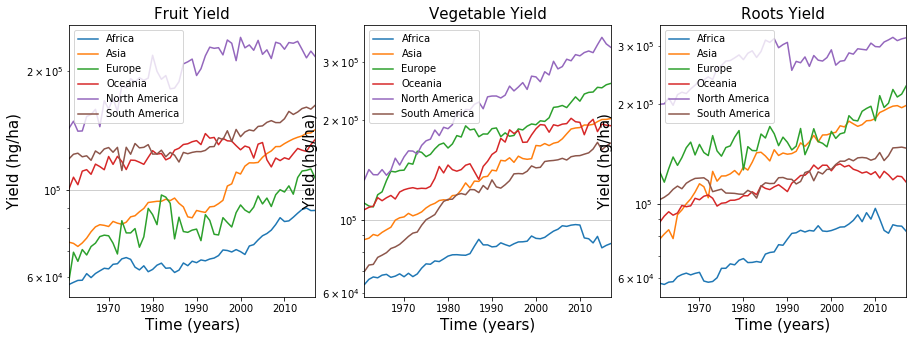

In [28]:
# Visualisation of the evolution of the quantity of crops per continent

def select_area(production, area):
    df = production[production.Area == area]
    fruit = df[df['Item Code'] == 1738]
    veggies = df[df['Item Code'] == 1735]
    roots = df[df['Item Code'] == 1720]
    return  fruit, veggies, roots

yield_crops = crops[crops.Element=='Yield']
yield_crops  = yield_crops.sort_values('Year')

afr_fruit, afr_veggies, afr_roots = select_area(yield_crops, 'Africa')
eu_fruit, eu_veggies, eu_roots   = select_area(yield_crops, 'Europe')
as_fruit, as_veggies, as_roots   = select_area(yield_crops, 'Asia')
oc_fruit, oc_veggies, oc_roots   = select_area(yield_crops, 'Oceania')
nam_fruit, nam_veggies, nam_roots = select_area(yield_crops, 'Northern America')
sam_fruit, sam_veggies, sam_roots = select_area(yield_crops, 'South America')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1,3,1)

afr_fruit.plot('Year', 'Value', logy=True, ax=ax1)
as_fruit.plot('Year', 'Value', logy=True, ax=ax1)
eu_fruit.plot('Year','Value', logy=True, ax=ax1)
oc_fruit.plot('Year', 'Value', logy=True, ax=ax1)
nam_fruit.plot('Year', 'Value', logy=True, ax=ax1)
sam_fruit.plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Fruit Yield', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.set_ylabel('Yield (hg/ha)', fontsize=15)
ax1.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax1.grid(axis='y', alpha=0.75)

ax2 = fig.add_subplot(1,3,2)
afr_veggies.plot('Year', 'Value', logy=True, ax=ax2)
as_veggies.plot('Year', 'Value', logy=True, ax=ax2)
eu_veggies.plot('Year', 'Value', logy=True, ax=ax2)
oc_veggies.plot('Year', 'Value', logy=True, ax=ax2)
nam_veggies.plot('Year', 'Value', logy=True, ax=ax2)
sam_veggies.plot('Year', 'Value', logy=True, ax=ax2)
ax2.set_title('Vegetable Yield', fontsize=15)
ax2.set_xlabel('Time (years)', fontsize=15)
ax2.set_ylabel('Yield (hg/ha)', fontsize=15)
ax2.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax2.grid(axis='y', alpha=0.75)

ax3 = fig.add_subplot(1,3,3)
afr_roots.plot('Year', 'Value', logy=True, ax=ax3)
as_roots.plot('Year', 'Value', logy=True, ax=ax3)
eu_roots.plot('Year', 'Value', logy=True, ax=ax3)
oc_roots.plot('Year', 'Value', logy=True, ax=ax3)
nam_roots.plot('Year', 'Value', logy=True, ax=ax3)
sam_roots.plot('Year', 'Value', logy=True, ax=ax3)
ax3.set_title('Roots Yield', fontsize=15)
ax3.set_xlabel('Time (years)', fontsize=15)
ax3.set_ylabel('Yield (hg/ha)', fontsize=15)
ax3.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax3.grid(axis='y', alpha=0.75)

Northern America is the biggest producer by far.
Let's use a map to represent this information. We will use the same commands as before.

In [29]:
# Example : Yield of Fruits in 2000

# Merge the df_json dataframe to our yield dataframe
yield_crops = yield_crops.merge(df_json, on='Area', how='inner')

map2 = folium.Map(location=[0,0], zoom_start=2)
state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)
data = yield_crops[yield_crops.Year == 2000]
data = data[data.Item == 'Roots and Tubers,Total']

folium.Choropleth(geo_data=geo_json_data, data=data,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='Oranges', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Yield of roots in 2000').add_to(map2)
map2.save('yield_fruit_2000.html')
map2

For crops production (https://yield_fruit_2000.html), we still have a non uniform distribution of the production. European countries, USA and Australia present the highest yields in root production.

#### 3) Cereal production

The cereal production and yield are given in the same data frame as vegetables. We will take a look at the cereals and the coarse grains.

['Cereals,Total' 'Coarse Grain, Total']


/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


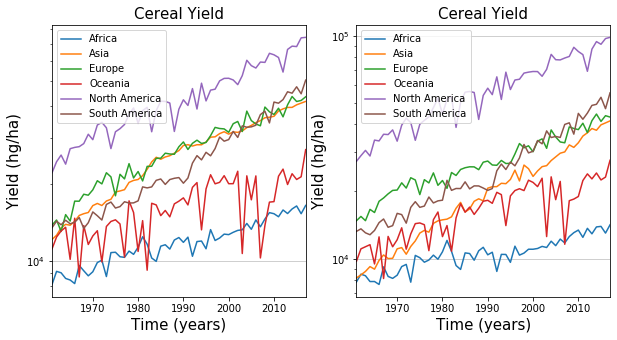

In [30]:
crops = df_prod_crops.copy()

cereal_items = [1717, 1814]
crops_cereals = crops[crops['Item Code'].isin(cereal_items)]
print(crops_cereals.Item.unique())

# Compute the log values
crops_cereals['Log Value'] = crops_cereals.Value.transform(lambda x:round(np.log(x)))
crops_cereals['Log Value'] = crops_cereals['Log Value'].replace(-np.inf, 0)

# Take the yield values for cereals
tmp  = crops_cereals[crops_cereals.Element == 'Yield']
cereals_yield = tmp[tmp['Item Code'] == 1717]
cereals_yield = cereals_yield.sort_values('Year')
grains_yield = tmp[tmp['Item Code'] == 1814]
grains_yield = grains_yield.sort_values('Year')

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)

cereals_yield[cereals_yield.Area == 'Africa'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Asia'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Europe'].plot('Year','Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Oceania'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Northern America'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'South America'].plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Cereal Yield', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.set_ylabel('Yield (hg/ha)', fontsize=15)
ax1.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax1.grid(axis='y', alpha=0.75)

ax2 = fig.add_subplot(1,2,2)

grains_yield[grains_yield.Area == 'Africa'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Asia'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Europe'].plot('Year','Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Oceania'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Northern America'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'South America'].plot('Year', 'Value', logy=True, ax=ax2)
ax2.set_title('Cereal Yield', fontsize=15)
ax2.set_xlabel('Time (years)', fontsize=15)
ax2.set_ylabel('Yield (hg/ha)', fontsize=15)
ax2.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax2.grid(axis='y', alpha=0.75)

We think that wi have an issue with missing values for oceanian coutries. We should take this issue into consideration before Milestone 3.

Again, the corresponding map follows.

In [31]:
# Example : Yield of Cereals in 2000

# Merge the df_json dataframe to our initial dataframe
cereals_yield = cereals_yield.merge(df_json, on='Area', how='inner')

map3 = folium.Map(location=[0,0], zoom_start=2)
state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)
data = cereals_yield[cereals_yield.Year == 2000]

map3.Choropleth(geo_data=geo_json_data, data=data,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='Oranges', fill_opacity=0.6, line_opacity=0.2,
             legend_name='Production of Cereals in 2000')

map3.save('yield_cereals_2000.html')
map3

/home/clelie/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


The map is visible here: https://yield_cereals_2000.html

This is no big surprise, some countries are way more producing than other countries, regardless on their superficies. We would like to know how can we link this big production to the fertilizers use: do several models of agriculture exist or do we have a similar use of fertilizers for a same production? How can we relate the fertilizers use to the type of food that is produced?

## Part 2 : Study of Correlation between Fertilizer Use and Yield using PCA

Aim: we will use the fertilizer and yield data to study how fertilizer use and yields have evolved overtime. As there are many different yields (for different food groups) we will use dimensionality reduction (first with PCA, later with UMAP), on the yield data. 

In [34]:
#reading the FAO data set
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')

For a first exploration of the data, we will look at the year 2016 and the nitrogen fertilizer.

In [35]:
#Determining countries most fertilizer consumer for the last year of using
fertilizer=(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300') #exclude the grouped countried (i.e. europe, etc)
    .sort_values('Value', ascending=False)
)

fertilizer.head(2)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
fertilizer = fertilizer.merge(df_json, on='Area', how='inner')
map_ferti = folium.Map(location=[0,0], zoom_start=2)
folium.Choropleth(geo_data=geo_json_data, data=fertilizer,
             columns=['id', 'Value'],
             key_on='feature.id',
             fill_color='Reds', fill_opacity=1, line_opacity=0.2,
             legend_name='ADD TITLE', name='fertilizers').add_to(map_ferti)

For the yields we again take the year 2016, and take the yields based on food group (rather than specific yields for each food item). 

We will replace the na values with 0 because we assume that if no data is available for a given country, they do not produce these foods.

In [100]:
grouped_yields=(crops.query('`Element Code` == 5419') #take yield (not production, area harvested)
        .query('`Year Code` == 2016')
        .query('`Item Code` >1000') #take the grouped foods
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0) 
        .reset_index()
          )
grouped_yields.head(2)

Item         Area  Cereals (Rice Milled Eqv)  Cereals,Total  \
0     Afghanistan                    19391.0        19816.0   
1          Africa                    14245.0        15261.0   

Item  Citrus Fruit,Total  Coarse Grain, Total  Fruit Primary  Pulses,Total  \
0                83127.0              16667.0        88201.0        7406.0   
1               108260.0              13007.0        88514.0        7629.0   

Item  Roots and Tubers,Total  Treenuts,Total  Vegetables Primary  
0                   119868.0         15984.0             91869.0  
1                    85875.0          5437.0             83707.0

Now we define a function which classifies fertilizer use in to low, medium or high values based on percentile.

In [16]:
def ferti_class(x, L): #associate a color to each bin of fertilizer
    if x<np.percentile(L,33):
        return 'low'
    elif np.percentile(L,33)<=x<np.percentile(L,66):
        return 'medium'
    else:
        return 'high'

We define a function for performing PCA.
First the value is standardized using StandardScaler and then calculate the two first principal components.

In [17]:
def pre_processing_PCA(df, target, features):
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the countries
    y = df.loc[:,[target]].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    return x

def PCA_processing(df, target, features):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(pre_processing_PCA(df, target, features))
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
    return pca,pd.concat([principalDf, df[[target]]], axis=1)

Next we perform the pca analysis on our yield data, merge this with the fertilizer value for each country and apply the fertilizer classification function defined above (to indicate low, medium or high fertilizer use).

In [18]:
pca,grouped_yield_pca = PCA_processing(grouped_yields,'Area', grouped_yields.columns[1:])
grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')
grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(lambda x: ferti_class(x, grouped_yield_pca.Value))


Finally, we visualize the results of the PCA.
First, we plot the two principal components and add **a posteriori** colors corresponding to the high, medium and low fertilizer groups.
Then,we show the boxplots of the projected values of PC1 and PC2 by fertilizer groups.
Finally, instead of using a categorical approach, we use a quantitative approach and perform a linear regression between principal components and fertilizer use value. 

Text(0, 0.5, 'Fertilizer use')

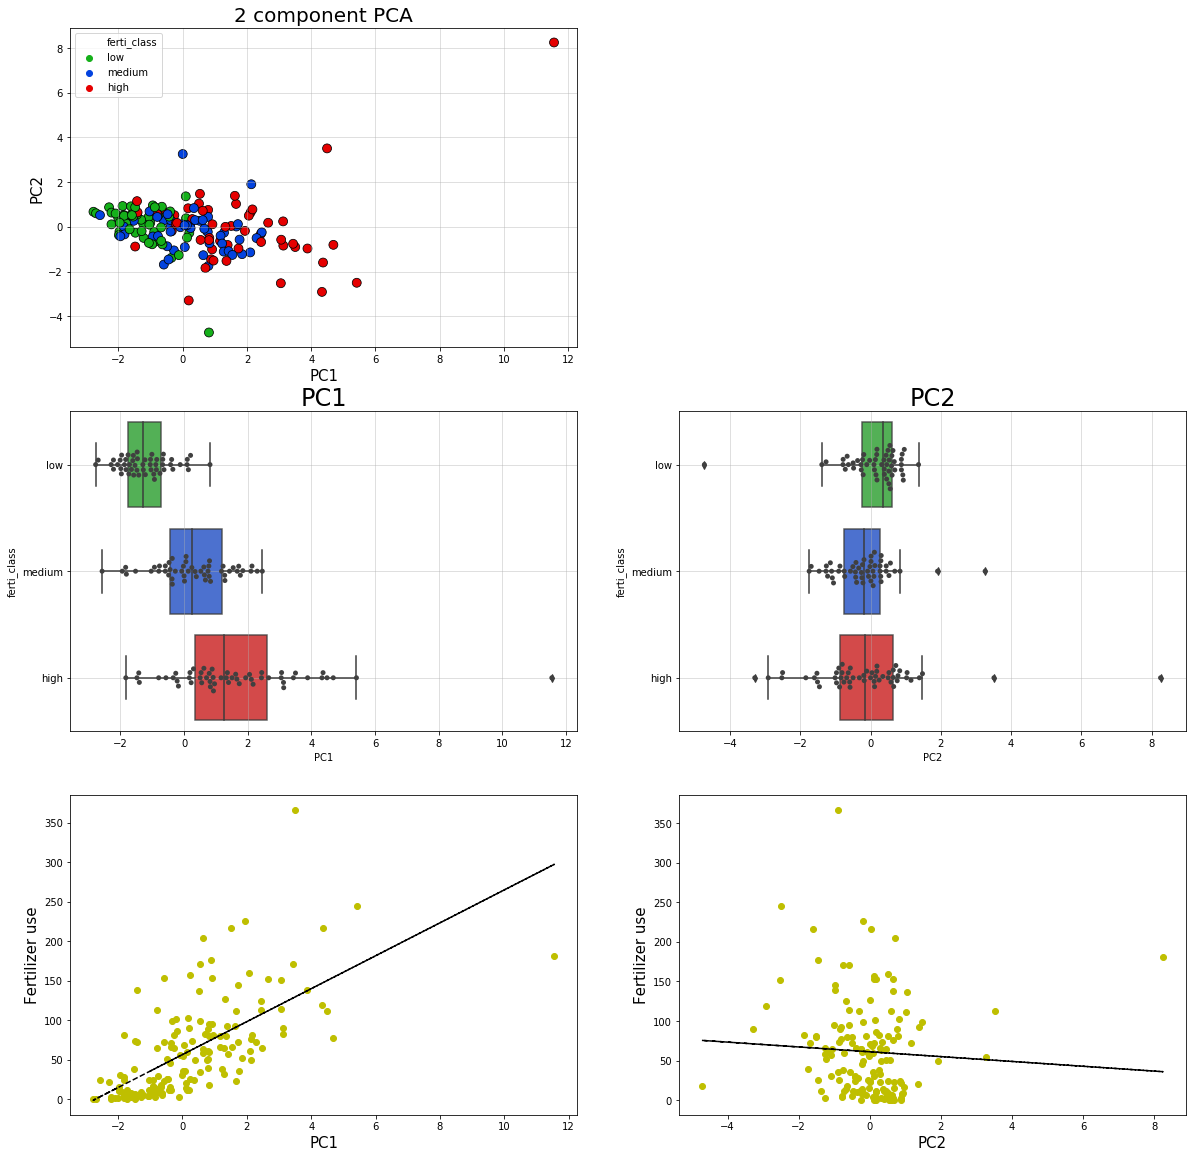

In [19]:
#Viz for 1 year 
figure = plt.figure(figsize = (20,20))
colors = ["green", "blue", "red"]

ax1 = figure.add_subplot(3,2,1)
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 component PCA', fontsize = 20)
ax1.grid(alpha=0.5)
ax1 = sns.scatterplot(x='PC1', y='PC2', hue='ferti_class', palette=sns.xkcd_palette(colors), data=grouped_yield_pca, s=80,edgecolor="black")

ax2 = figure.add_subplot(3,2,3)
ax2 = sns.boxplot(x='PC1', y='ferti_class', data=grouped_yield_pca, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax2 = sns.swarmplot(x='PC1', y='ferti_class', data=grouped_yield_pca, color=".25")
ax2.grid(alpha=0.5)
plt.title('PC1', fontsize=24);

ax3 = figure.add_subplot(3,2,4)
ax3 = sns.boxplot(x='PC2', y='ferti_class', data=grouped_yield_pca, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax3 = sns.swarmplot(x='PC2', y='ferti_class', data=grouped_yield_pca, color=".25")
ax3.grid(alpha=0.5)
plt.title('PC2', fontsize=24);

ax4 = figure.add_subplot(3,2,5)
coef = np.polyfit(grouped_yield_pca.PC1,grouped_yield_pca.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(grouped_yield_pca.PC1,grouped_yield_pca.Value, 'yo',grouped_yield_pca.PC1, poly1d_fn(grouped_yield_pca.PC1), '--k')
ax4.set_xlabel('PC1', fontsize = 15)
ax4.set_ylabel('Fertilizer use', fontsize = 15)

ax5 = figure.add_subplot(3,2,6)
coef = np.polyfit(grouped_yield_pca.PC2,grouped_yield_pca.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(grouped_yield_pca.PC2,grouped_yield_pca.Value, 'yo',grouped_yield_pca.PC2, poly1d_fn(grouped_yield_pca.PC2), '--k')
ax5.set_xlabel('PC2', fontsize = 15)
ax5.set_ylabel('Fertilizer use', fontsize = 15)

**Observations:** 
- The first plot shows that the fertilizer groups are not randomly distributed across the PCA. There might be a correlation between principal components and fertilizer use, especially for PC1.
- The boxplots of the projection makes this correlation even clearer for PC1.
- The regression confirms finally this tendancy.

We can observe especially 1 outlier at the top right corner which is United Arab Emirates. It could be interesting to study what makes this country that different than others.

In [129]:
print(stats.shapiro(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='low']),'\n',
      stats.shapiro(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='medium']),'\n',
      stats.shapiro(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='high']))
print('High group cannot be modelize by a normal distribution. As anova is not very robust to normal distribution assumption, we will use a Kruskal Wallis non-parametric test.')

(0.9822317361831665, 0.6246424317359924) 
 (0.9834321141242981, 0.6912586092948914) 
 (0.8739449977874756, 4.023095243610442e-05)
High group cannot be modelize by a normal distribution. As anova is not very robust to normal distribution assumption, we will use a Kruskal Wallis non-parametric test.


In [130]:
import scikit_posthocs as sp

print(stats.kruskal(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='low'],
                    grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='medium'],
                    grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='high']))

print(sp.posthoc_dunn([grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='low'],
                    grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='medium'],
                    grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='high']]))
print('The groups are significantly different, based on rank test on PC1')

KruskalResult(statistic=73.62301148212293, pvalue=1.0303058983549591e-16)
              1             2             3
1 -1.000000e+00  4.981170e-08  2.505717e-17
2  4.981170e-08 -1.000000e+00  3.467660e-03
3  2.505717e-17  3.467660e-03 -1.000000e+00
The groups are significantly different, based on rank test on PC1


As PC1 seems associated with fertlizer use, we want to know how the yields are represented by the principal components.

In [20]:
df = pd.DataFrame(pca.components_, columns=list(grouped_yields.columns[1:]))
df.head(2)

Cereals (Rice Milled Eqv)  Cereals,Total  Citrus Fruit,Total  \
0                   0.447310       0.445459            0.064642   
1                   0.358542       0.359029           -0.236136   

   Coarse Grain, Total  Fruit Primary  Pulses,Total  Roots and Tubers,Total  \
0             0.440154       0.248610      0.308481                0.371344   
1             0.361944      -0.353178     -0.269843               -0.377510   

   Treenuts,Total  Vegetables Primary  
0        0.168310            0.283501  
1       -0.235045           -0.400590

**Observation:** PC1 relies mostly on Cereals, Coarse Grain, Roots and Tubers, and Pulses. Moreover, the coefficients of those yields are all positive, showing a positive correlation between them and fertilizer use.
We want now to confirm those results by looking at the relationship between those yields independently and fertilizer use.

In [21]:
yields_ferti = pd.merge(grouped_yields,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')

Text(0, 0.5, 'Fertilizer use')

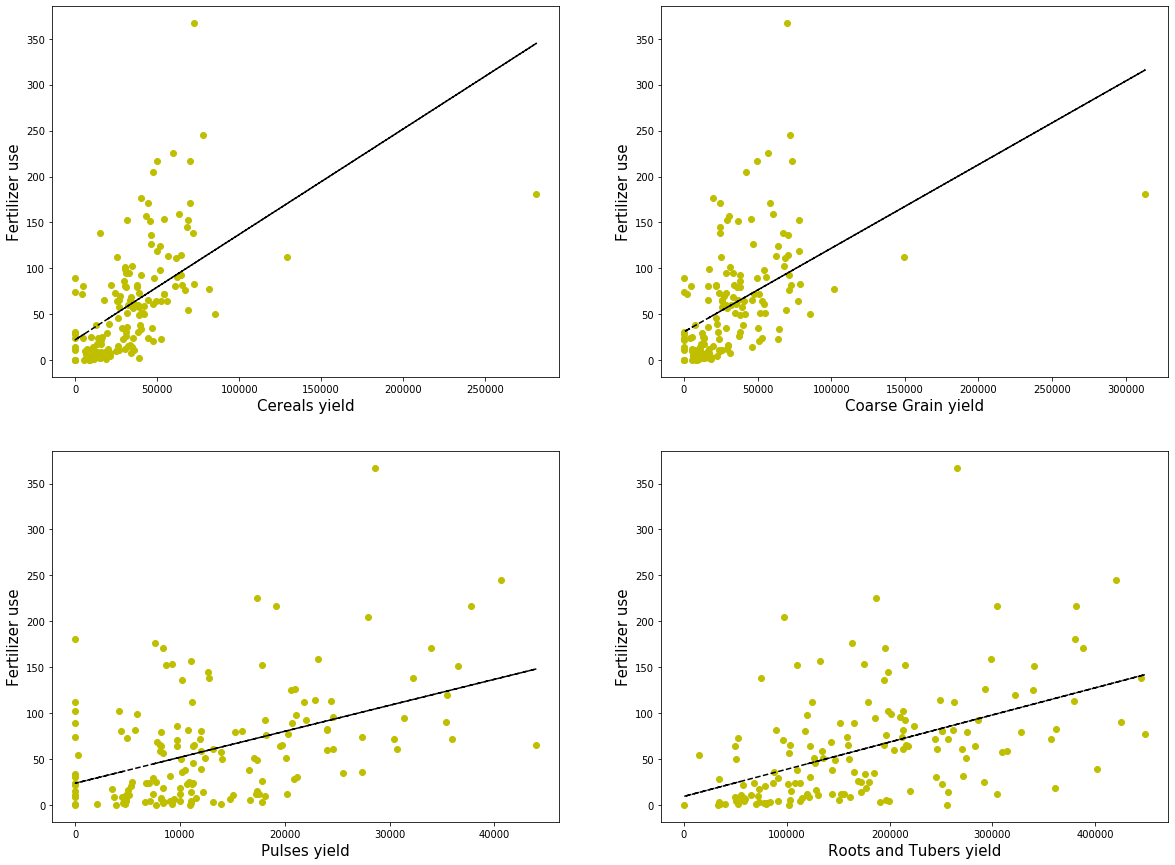

In [22]:
#Viz for 1 year 
figure = plt.figure(figsize = (20,15))

ax1 = figure.add_subplot(2,2,1)
coef = np.polyfit(yields_ferti['Cereals,Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Cereals,Total'],yields_ferti.Value, 'yo',yields_ferti['Cereals,Total'], poly1d_fn(yields_ferti['Cereals,Total']), '--k')
ax1.set_xlabel('Cereals yield', fontsize = 15)
ax1.set_ylabel('Fertilizer use', fontsize = 15)

ax2 = figure.add_subplot(2,2,2)
coef = np.polyfit(yields_ferti['Coarse Grain, Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Coarse Grain, Total'],yields_ferti.Value, 'yo',yields_ferti['Coarse Grain, Total'], poly1d_fn(yields_ferti['Coarse Grain, Total']), '--k')
ax2.set_xlabel('Coarse Grain yield', fontsize = 15)
ax2.set_ylabel('Fertilizer use', fontsize = 15)

ax3 = figure.add_subplot(2,2,3)
coef = np.polyfit(yields_ferti['Pulses,Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Pulses,Total'],yields_ferti.Value, 'yo',yields_ferti['Pulses,Total'], poly1d_fn(yields_ferti['Pulses,Total']), '--k')
ax3.set_xlabel('Pulses yield', fontsize = 15)
ax3.set_ylabel('Fertilizer use', fontsize = 15)

ax4 = figure.add_subplot(2,2,4)
coef = np.polyfit(yields_ferti['Roots and Tubers,Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Roots and Tubers,Total'],yields_ferti.Value, 'yo',yields_ferti['Roots and Tubers,Total'], poly1d_fn(yields_ferti['Roots and Tubers,Total']), '--k')
ax4.set_xlabel('Roots and Tubers yield', fontsize = 15)
ax4.set_ylabel('Fertilizer use', fontsize = 15)

**Observation:** As expected, there are positive correlations between the fertilizer use and the presented yields.

However, we did only this analysis for the year 2016. Do we observe the same tendancy for the other years and how does it evolve? 
How this evolution compares with the evolution of fertilizer use? 

We will reproduce the same code for each year to compute the medians of the PC1 for the fertilizer groups for each year.

In [24]:
years = []
PC1_low = []
PC1_medium = []
PC1_high = []
PC1 = []
ferti_low = []
ferti_medium = []
ferti_high = []
ferti = []
proportion_explained = []
for year in range(2002,2017):
    years += [year]
    
    grouped_yield=crops.query('`Element Code` == 5419')\
                                .query('`Year Code` == @year')\
                                .query('`Item Code` >1000')\
                                .pivot(index='Area',columns='Item',values='Value')\
                                .fillna(value=0)\
                                .reset_index()

    pca,grouped_yield_pca = PCA_processing(grouped_yield,'Area', grouped_yield.columns[1:])


    fertilizer=(fertilizer_area.query('`Item Code` == (3102)')
        .query('`Year Code` == @year')
        .query('`Area Code` <300')
        .sort_values('Value', ascending=False)
    )

    grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')
    grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(lambda x: ferti_class(x, grouped_yield_pca.Value))

    PC1_low += [np.median(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='low'])]
    PC1_medium += [np.median(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='medium'])]
    PC1_high += [np.median(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='high'])]
    PC1 += [np.median(grouped_yield_pca.PC1)]
    
    
    #print(len(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='low']),len(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='medium']),len(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='high']))
    ferti_low += [np.median(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='low'])]
    ferti_medium += [np.median(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='medium'])]
    ferti_high += [np.median(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='high'])]
    
    ferti += [np.median(grouped_yield_pca.Value)]
                          
    proportion_explained += [pca.explained_variance_ratio_[0]]

(0, 1)

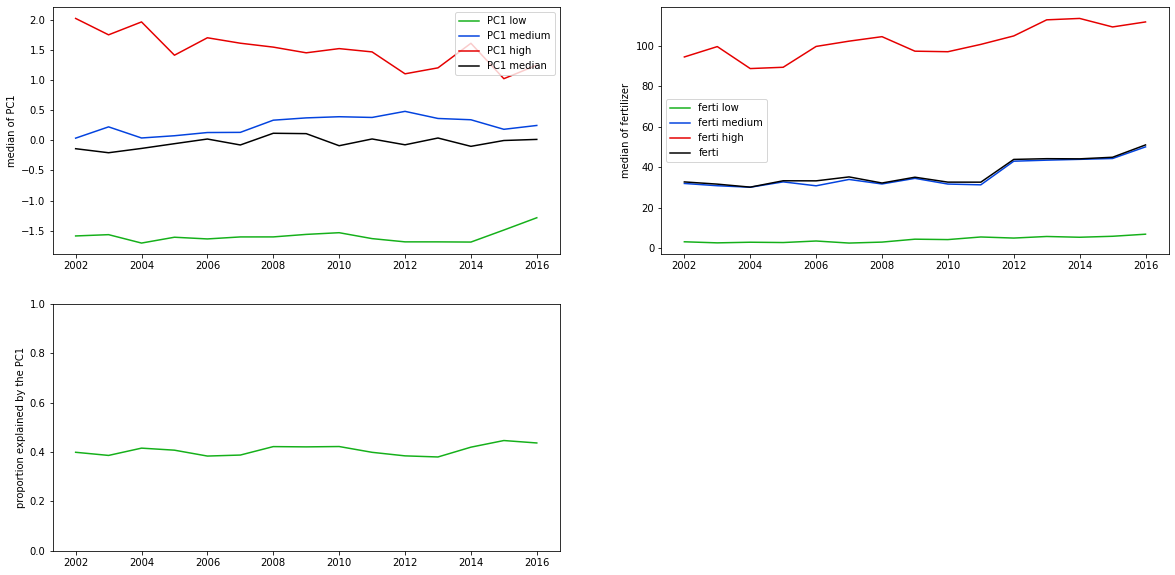

In [105]:
evolution_ferti = pd.DataFrame([years, PC1_low, PC1_medium, PC1_high, ferti_low, ferti_medium, ferti_high,ferti,PC1, proportion_explained], ['year', 'PC1 low', 'PC1 medium', 'PC1 high','ferti low', 'ferti medium', 'ferti high','ferti','PC1 median', 'proportion explained']).T

figure = plt.figure(figsize = (20,10))
ax1 = figure.add_subplot(2,2,1)
ax1.plot("year", "PC1 low", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax1.plot("year", "PC1 medium", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax1.plot("year", "PC1 high", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax1.plot("year", "PC1 median", data=evolution_ferti, color=sns.xkcd_rgb["black"])
ax1.set_ylabel('median of PC1')
ax1.legend()

ax2 = figure.add_subplot(2,2,2)
ax2.plot("year", "ferti low", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax2.plot("year", "ferti medium", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax2.plot("year", "ferti high", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax2.plot("year", "ferti", data=evolution_ferti, color=sns.xkcd_rgb["black"])
ax2.set_ylabel('median of fertilizer')
ax2.legend()

ax3 = figure.add_subplot(2,2,3)
ax3.plot("year", 'proportion explained', data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax3.set_ylabel('proportion explained by the PC1')
ax3.set_ylim([0,1])

**Observation:** 
- While the PC1 remains relatively stable for the low fertilizer and the medium fertilizer groups, it clearly decreases overtime for the high fertilizer group. 
- At the same time, fertilizer use keeps increasing for all the groups.
- The explained proportion remains relativaly stable around 0.4 overtime, showing that PCA performed quite well for all years.

We observed this relationship when considering groups of countries. Can we see the same tendancy with one single country of each group?

In [26]:
years = []
Burkina_Faso_pca = []
Armenia_pca = []
Belgium_pca = []
Burkina_Faso_ferti = []
Armenia_ferti = []
Belgium_ferti = []
proportion_explained = []
for year in range(2002,2017):
    years += [year]
    
    grouped_yield=crops.query('`Element Code` == 5419')\
                                .query('`Year Code` == @year')\
                                .query('`Item Code` >1000')\
                                .pivot(index='Area',columns='Item',values='Value')\
                                .fillna(value=0)\
                                .reset_index()

    pca,grouped_yield_pca = PCA_processing(grouped_yield,'Area', grouped_yield.columns[1:])


    fertilizer=(fertilizer_area.query('`Item Code` == (3102)')
        .query('`Year Code` == @year')
        .query('`Area Code` <300')
        .sort_values('Value', ascending=False)
    )

    grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')
    grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(lambda x: ferti_class(x, grouped_yield_pca.Value))

    Burkina_Faso_pca += [grouped_yield_pca[grouped_yield_pca.Area=='Burkina Faso'].PC1.values[0]]
    Armenia_pca += [grouped_yield_pca[grouped_yield_pca.Area=='Armenia'].PC1.values[0]]
    Belgium_pca += [grouped_yield_pca[grouped_yield_pca.Area=='Belgium'].PC1.values[0]]
    Burkina_Faso_ferti += [grouped_yield_pca[grouped_yield_pca.Area=='Burkina Faso'].Value.values[0]]
    Armenia_ferti += [grouped_yield_pca[grouped_yield_pca.Area=='Armenia'].Value.values[0]]
    Belgium_ferti += [grouped_yield_pca[grouped_yield_pca.Area=='Belgium'].Value.values[0]]
                    
    proportion_explained += [pca.explained_variance_ratio_[0]]
    
    

(0, 1)

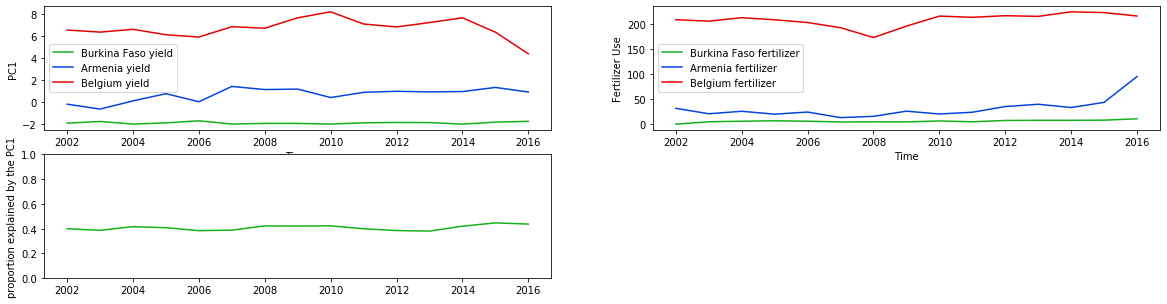

In [106]:
evolution_ferti = pd.DataFrame([years, Burkina_Faso_pca, Armenia_pca, Belgium_pca,Burkina_Faso_ferti, Armenia_ferti, Belgium_ferti,proportion_explained], ['year', 'Burkina Faso yield', 'Armenia yield', 'Belgium yield','Burkina Faso fertilizer', 'Armenia fertilizer', 'Belgium fertilizer','proportion explained']).T

figure = plt.figure(figsize = (20,5))
ax1 = figure.add_subplot(2,2,1)
ax1.plot("year", "Burkina Faso yield", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax1.plot("year", "Armenia yield", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax1.plot("year", "Belgium yield", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax1.set_ylabel('PC1')
ax1.set_xlabel('Time')
ax1.legend()

ax2 = figure.add_subplot(2,2,2)
ax2.plot("year", "Burkina Faso fertilizer", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax2.plot("year", "Armenia fertilizer", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax2.plot("year", "Belgium fertilizer", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax2.set_ylabel('Fertilizer Use')
ax2.set_xlabel('Time')
ax2.legend()

ax3 = figure.add_subplot(2,2,3)
ax3.plot("year", 'proportion explained', data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax3.set_ylabel('proportion explained by the PC1')
ax3.set_ylim([0,1])

**Observation:** 
We observe the same tendancy with one single country for each group.

## Part 3 : UMAP Analysis - Dimensionality Reduction to 1 Dimension

After studying the relationship using PCA, we wanted to test another non-linear dimensionality reduction method in order to see if we find comparable results. 

First, we create a function which applies the UMAP method to the yield data for a given year and computes a linear regression between fertilizer use and the umap result.

In [108]:
# Creation of a function doing the umap (works also for only 1 dimension end)
def umap_year(year, n_components=2): 
    yield_for_merge=(crops.query('`Element Code` == 5419') #extraction of yield in crop dataset and pivot to have a df with each yield as a column (feature)
            .query('`Year Code` == @year')
            .query('`Item Code` >1000')
            .pivot(index='Area',columns='Item',values='Value')
            .fillna(value=0)
            .reset_index()
              )
    yield_for_umap=yield_for_merge.drop('Area',axis=1).values # To perform the umap, we need to select only the features
    
    #Normalization 
    x = yield_for_umap
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    yield_for_umap = pd.DataFrame(x_scaled)
    
    reducer = umap.UMAP(random_state=1, n_components= n_components)
    embedding = reducer.fit_transform(yield_for_umap)
    embedding2=pd.DataFrame(embedding)
    embedding2=pd.merge(embedding2,yield_for_merge['Area'], left_index=True, right_index=True)
    
    umap_fertilizer=(fertilizer_area
                    .query('Year == @year')
                    .query('`Area Code` <300')
                    .query('`Item Code` == (3102)')
                    .loc[:,['Area','Value']]
                    )
    embedding2=pd.merge(embedding2,umap_fertilizer,left_on='Area',right_on='Area')
    embedding2[0]=embedding2[0]/max(embedding2[0])
    embedding2['Value']=embedding2['Value']/max(embedding2['Value'])
    embedding2['ferti_class']=embedding2.Value.apply(lambda x: ferti_class(x, embedding2.Value))
    
    coef = np.polyfit(embedding2[0],embedding2.Value,1)
    
    return year,embedding2,coef # return year (for confirmation), performed umap and value of linear regression

We visualize for one year (2016) the regression result for umap result vs fertilizer use.

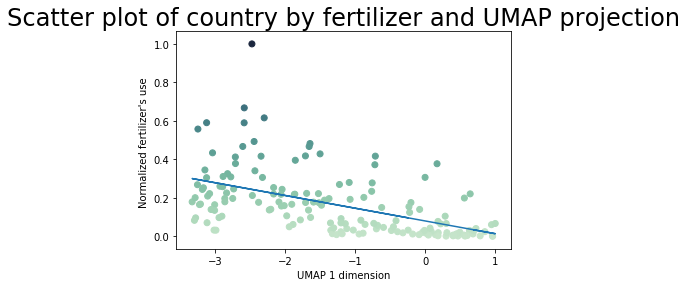

[-0.06629834  0.07961216]


In [124]:
#Visualization for year 2016

vis_2016=umap_year(2016,1)

embedding2=vis_2016[1] 
coef = vis_2016[2]
poly1d_fn = np.poly1d(coef)
clarity_ranking = embedding2.Value

cmap = sns.cubehelix_palette(as_cmap=True,rot=-.4)
plt.scatter(embedding2[0], embedding2.Value,c=clarity_ranking, cmap=cmap)
plt.plot(embedding2[0], poly1d_fn(embedding2[0]))
plt.gca().set_aspect('auto', 'datalim')
plt.title('Scatter plot of country by fertilizer and UMAP projection', fontsize=24);
plt.xlabel("UMAP 1 dimension")
plt.ylabel("Normalized fertilizer's use ")
plt.show()
print(coef)

We see that fertilizer use is higher towards the left. There is a negative correlation between UMAP1 and fertilizer use, confirming that there is a correlation between the reduced dimension representation of yield and fertilizer use.  

1 outliers is present and coincides with the highest value of fertilizer use. Let's check which country this is:

In [125]:
# looking at countries names
embedding2.sort_values(by='Value',ascending=False).head(1)

0   Area  Value ferti_class
46 -2.471586  Egypt    1.0        high

In [126]:
# Looking at yield for these countries
grouped_yields.loc[grouped_yields.Area.isin(['Egypt'])]

Item   Area  Cereals (Rice Milled Eqv)  Cereals,Total  Citrus Fruit,Total  \
69    Egypt                    67013.0        72493.0            244379.0   

Item  Coarse Grain, Total  Fruit Primary  Pulses,Total  \
69                69967.0       226365.0       28615.0   

Item  Roots and Tubers,Total  Treenuts,Total  Vegetables Primary  
69                  265779.0         57190.0            240120.0

From a first look, there is nothing strange about their data and looking back at the FAO dataset there is no unusual flag set for this country. 
Therefore, it may be interesting to look further in to this outlier. 


Next we visualize the distribution of umap value for each fertilizer class (low, medium, high):

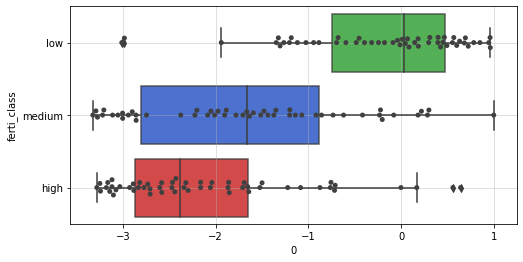

In [127]:
#Boxplot of umap 1-dim with country fertilizer's use classified in 3 different equaly sized group 
fig = plt.figure(figsize = (8,4))

colors = ["green", "blue", "red"]
#cmap = sns.cubehelix_palette(rot=-.4)
ax = sns.boxplot(x=embedding2[0], y='ferti_class', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[0], y='ferti_class', data=embedding2, color=".25")
ax.grid(alpha=0.5)

Here we can see that higher fertilizer use is on the left and there is a significant difference between the high/medium fertilizer use groups and the low fertilizer use group.

Next we perform a umap analysis for each year and look at the evolution of the coefficient of the linear regression of umap vs fertilizer use:

In [117]:
# umap for all years available in the fertilizer dataset (the more restrictive dataset)
mean=[]
for year in fertilizer_area.pivot_table(index=['Year Code']).index :
    adding=umap_year(year,1)
    mean.append([adding[0],adding[2][0]])
mean=pd.DataFrame(mean)

Text(0.5, 1.0, 'Evolution of linear regression (fertilizer/axe0) over the year')

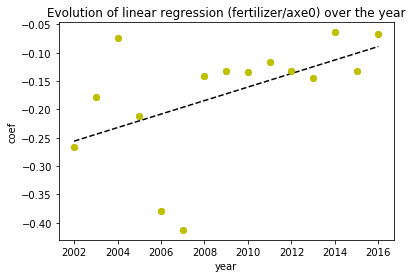

In [128]:
# look at coef over the years
coef = np.polyfit(mean[0],mean[1],1) #test regression dim 1 ...
poly1d_fn = np.poly1d(coef)
plt.plot(mean[0],mean[1], 'yo',mean[0], poly1d_fn(mean[0]), '--k')
plt.plot(mean[0],mean[1], 'yo')
plt.xlabel('year')
plt.ylabel('coef')
plt.title('Evolution of linear regression (fertilizer/axe0) over the year')

Here we can see that the absolute value of the coefficient is decreasing, showing that the correlation between fertilizer use and umap value is decreasing overtime. 

In [122]:
#Compute error of the regression
stats.linregress(mean[0],mean[1])

LinregressResult(slope=0.01193634107509808, intercept=-24.152669935827404, rvalue=0.507656591196675, pvalue=0.05338164141186508, stderr=0.005618427668196246)

## Summary from Parts 2 and 3:

So far, we have seen from Part 2 that yields are not necessarily increasing despite a consistent increase in fertilizer use overtime. 
Part 3 confirms this observation because we see that the correlation between fertilizer use and umap value (which is a one dimensional representation of the yield) is decreasing - therefore knwoing that the consumption of fertilizer is increasing, this can be interpreted as a decrease in the positive effect of fertilizer on yield.

This is an interesting observation as it indicates that we may have a situation where a given increase in fertilizer use is no longer producing the same increase in yield as it has in the past. 

This is also interesting given that besides influencing yield, fertilizer also has an environmental impact. Typically this is 'justified' by the fact that it helps to produce the higher yields required to feed our growing population. However, if the benefits of fertilizer use are no longer clear, this could be an argument for moving towards alternative forms of agriculture.

In order to further our analysis, we will look further in to the environmental impacts of agriculture (and particularly of fertilizer) below.

## Part 4 : Environmental impact


Here, we will look to understand the relationshp between the environmental impacts of fertilizer use and agricultural yields and see if we observe similar relationshps to the fertilizer use and yield relationship studied in parts 2 and 3.

In [151]:
#Load the data set
total_emissions = pd.read_csv('./data/Emissions_AllAgriculture.csv', sep=',', encoding = 'latin-1')
total_emissions.columns = ('domain_code', 'domain', 'area_code','area', 'element_code','element','item_code', 'item','year_code','year','unit','value','flag', 'flag_description','note')
total_emissions.head(2)

domain_code             domain  area_code         area  element_code  \
0          GT  Agriculture Total          2  Afghanistan          7231   
1          GT  Agriculture Total          2  Afghanistan          7231   

             element  item_code                  item  year_code  year  \
0  Emissions (CO2eq)       5058  Enteric Fermentation       1961  1961   
1  Emissions (CO2eq)       5058  Enteric Fermentation       1962  1962   

        unit      value flag  \
0  gigagrams  5054.3459    A   
1  gigagrams  5151.5228    A   

                                    flag_description  note  
0  Aggregate, may include official, semi-official...   NaN  
1  Aggregate, may include official, semi-official...   NaN

First we will look at the evolution of global emissions due to agriculture per year, and then more specifically the evolution of global emissions due to fertilizer use per year.

In [152]:
#First let's look at global emissions evolution per year 
total_per_year = total_emissions.groupby('year').sum()
total_per_year.head(2)

area_code  element_code  item_code  year_code         value  note
year                                                                   
1961     171113      10000473    7000191    2712063  3.005584e+06   0.0
1962     171113      10000473    7000191    2713446  3.069126e+06   0.0

In [153]:
#And since we are focusing on fertilizers, let's look specficifally at the fertilizer emissions as well
fert_emissions = total_emissions.query("item == 'Synthetic Fertilizers'")
fert_emissions = fert_emissions.groupby('year').sum()
fert_emissions.head(2)

area_code  element_code  item_code  year_code       value  note
year                                                                 
1961      21855       1279887     895797     347097  78306.1006   0.0
1962      21855       1279887     895797     347274  90023.8397   0.0

Text(0.5, 1.0, 'Global Agriculture Emissions from Synthetic Fertilizers\n')

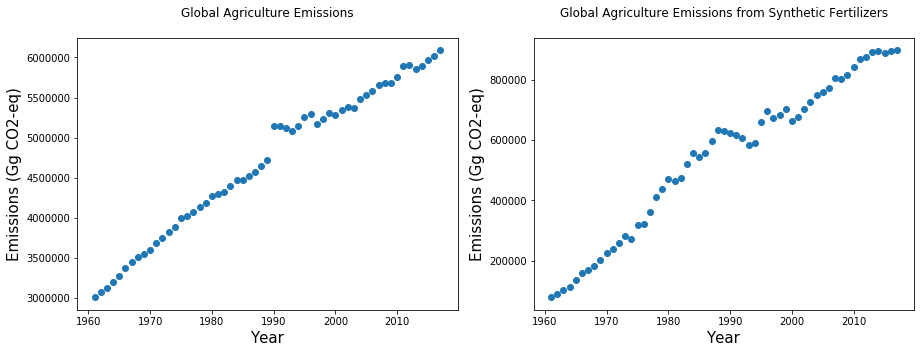

In [154]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)
plt.scatter(total_per_year.index.values, total_per_year.value)
ax1.set_xlabel("Year", fontsize=15)
ax1.set_ylabel("Emissions (Gg CO2-eq)", fontsize=15)
ax1.set_title("Global Agriculture Emissions\n")

ax2 = fig.add_subplot(1,2,2)
plt.scatter(fert_emissions.index.values, fert_emissions.value)
ax2.set_xlabel("Year", fontsize=15)
ax2.set_ylabel("Emissions (Gg CO2-eq)", fontsize=15)
ax2.set_title("Global Agriculture Emissions from Synthetic Fertilizers\n")

We can see that both are increasing (as expected) - although the emissions due to fertilizer appear to be slowing in increase over the last few years.

For global agricultural emissions, we can see that there is a weird jump roughly around the year 1990. Let's figure out why that is:

In [155]:
#First look for the exact year where the jump occurs
total_per_year.loc[1988:1992]

area_code  element_code  item_code  year_code         value  note
year                                                                   
1988     173018      10108938    7076127    2779224  4.642316e+06   0.0
1989     173018      10108938    7076127    2780622  4.717353e+06   0.0
1990     211837      12365010    8814324    3402900  5.146297e+06   0.0
1991     211170      12336086    8794098    3396646  5.140631e+06   0.0
1992     230556      13493046    9619349    3717072  5.125552e+06   0.0

We see above that the discontinuity occurs between 1989 and 1990.

One possible reason for this could be that data for more areas became available in this year - let's check:

In [156]:
emissions_1989 = total_emissions.query("year == 1989").groupby('area').sum()
countries_1989 = len(emissions_1989.index)
print(countries_1989)

195


In [157]:
emissions_1990 = total_emissions.query("year == 1990").groupby('area').sum()
countries_1990 = len(emissions_1990.index)
print(countries_1990)

208


It seems that our hypothesis was correct and the discontinuity can be explained by the addition of many more areas starting in 1990.

Now we want to continue our analysis on the relationship between yield and environmental impacts (and in particular environmental impacts of fertilizer).

In order to effectively compare impacts between countries, we will consider emissions per ha of agricultural land rather than total emissions, therefore first let's calculate this value:

In [158]:
total_area=pd.read_csv('./data/LandUse.csv',sep=',',encoding='latin-1')
total_area_agriculture = total_area.query("Item == 'Agriculture'")
total_area_agriculture.head(2)

Domain Code    Domain  Area Code         Area  Element Code Element  \
114          RL  Land Use          2  Afghanistan          5110    Area   
115          RL  Land Use          2  Afghanistan          5110    Area   

     Item Code         Item  Year Code  Year     Unit    Value Flag  \
114       6602  Agriculture       1961  1961  1000 ha  37700.0   Fc   
115       6602  Agriculture       1962  1962  1000 ha  37760.0   Fc   

    Flag Description  
114  Calculated data  
115  Calculated data

In [159]:
total_emissions = pd.merge(total_emissions, total_area_agriculture.loc[:,['Value', 'Area','Year']], left_on = ['area','year'], right_on = ['Area','Year'])
total_emissions.head(2)

domain_code             domain  area_code         area  element_code  \
0          GT  Agriculture Total          2  Afghanistan          7231   
1          GT  Agriculture Total          2  Afghanistan          7231   

             element  item_code                  item  year_code  year  \
0  Emissions (CO2eq)       5058  Enteric Fermentation       1961  1961   
1  Emissions (CO2eq)       5059     Manure Management       1961  1961   

        unit      value flag  \
0  gigagrams  5054.3459    A   
1  gigagrams   367.8310    A   

                                    flag_description  note    Value  \
0  Aggregate, may include official, semi-official...   NaN  37700.0   
1  Aggregate, may include official, semi-official...   NaN  37700.0   

          Area  Year  
0  Afghanistan  1961  
1  Afghanistan  1961

In [160]:
total_emissions['emissions_ha'] = total_emissions.value / total_emissions.Value
total_emissions.head(2)

domain_code             domain  area_code         area  element_code  \
0          GT  Agriculture Total          2  Afghanistan          7231   
1          GT  Agriculture Total          2  Afghanistan          7231   

             element  item_code                  item  year_code  year  \
0  Emissions (CO2eq)       5058  Enteric Fermentation       1961  1961   
1  Emissions (CO2eq)       5059     Manure Management       1961  1961   

        unit      value flag  \
0  gigagrams  5054.3459    A   
1  gigagrams   367.8310    A   

                                    flag_description  note    Value  \
0  Aggregate, may include official, semi-official...   NaN  37700.0   
1  Aggregate, may include official, semi-official...   NaN  37700.0   

          Area  Year  emissions_ha  
0  Afghanistan  1961      0.134068  
1  Afghanistan  1961      0.009757

Next we define some functions for classifying the level of emissions (as was done above for fertilizer use):

In [161]:
def emissions_class(x): 
    if x<low :
        return 0
    elif low<=x<medium:
        return 1
    else:
        return 2

In [162]:
def emissions_class2(x): 
    if x<low :
        return 'low'
    elif low<=x<medium:
        return 'medium'
    else:
        return 'high'

We will perform a umap dimensionality reduction to 2 dimensions on the yield data and visualize this in relation to the emissions classifications, therefore we will also load the yield dataset and prepare it for the dimensionality reduction analysis:

In [163]:
#load the yield dataset
total_yield=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
total_yield.head(2)


Area Code         Area  Item Code                 Item  Element Code  \
0          2  Afghanistan        221  Almonds, with shell          5312   
1          2  Afghanistan        221  Almonds, with shell          5312   

          Element  Year Code  Year Unit   Value Flag  
0  Area harvested       1975  1975   ha     0.0    F  
1  Area harvested       1976  1976   ha  5900.0    F

In [164]:
grouped_yield = total_yield.query('`Element Code` == 5419').query('`Item Code` >1000')
grouped_yield = grouped_yield.groupby(['Item','Year']).sum()
grouped_yield.head(2)

Area Code  Item Code  Element Code  Year Code  \
Item                      Year                                                  
Cereals (Rice Milled Eqv) 1961     191204     345230       1029610     372590   
                          1962     191204     345230       1029610     372780   

                                    Value  
Item                      Year             
Cereals (Rice Milled Eqv) 1961  2392177.0  
                          1962  2507171.0

In [165]:
#Prepare the yield dataset for umap dimensional reduction analysis:

grouped_yield_2016=(total_yield.query('`Element Code` == 5419') #by yield
        .query('`Year Code` == 2016') 
        .query('`Item Code` >1000') #grouped crops
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
grouped_yield_2016.head(2)

Item         Area  Cereals (Rice Milled Eqv)  Cereals,Total  \
0     Afghanistan                    19391.0        19816.0   
1          Africa                    14245.0        15261.0   

Item  Citrus Fruit,Total  Coarse Grain, Total  Fruit Primary  Pulses,Total  \
0                83127.0              16667.0        88201.0        7406.0   
1               108260.0              13007.0        88514.0        7629.0   

Item  Roots and Tubers,Total  Treenuts,Total  Vegetables Primary  
0                   119868.0         15984.0             91869.0  
1                    85875.0          5437.0             83707.0

In [166]:
yield_2016 = grouped_yield_2016.drop('Area',axis=1).values

#Normalization 
from sklearn import preprocessing

x = yield_2016
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
yield_2016 = pd.DataFrame(x_scaled)

For a first analysis, we will look at the year 2016 - therefore we will first isolate the emissions from this year, starting with all emissions:

In [167]:
emissions_2016 = total_emissions.query('year == 2016').groupby('area').sum()
emissions_2016.head(2)

area_code  element_code  item_code  year_code   year       value  \
area                                                                            
Afghanistan         18         65079      45560      18144  18144  13832.9964   
Albania             30         72310      52319      20160  20160   2924.0750   

             note     Value   Year  emissions_ha  
area                                              
Afghanistan   0.0  341190.0  18144      0.364890  
Albania       0.0   11817.0  20160      2.474465

In [168]:
#define the low and medium values to be used for classification of the emisisons data
low = np.percentile(emissions_2016.emissions_ha, 33.0)
medium = np.percentile(emissions_2016.emissions_ha, 66.0)

Next we apply umap to the data and classify in terms of emissions:

In [170]:
import umap

reducer = umap.UMAP(random_state=1)
embedding = reducer.fit_transform(yield_2016)
embedding2=pd.DataFrame(embedding)
embedding2=pd.merge(embedding2,grouped_yield_2016['Area'], left_index=True, right_index=True)
embedding2=pd.merge(embedding2,emissions_2016.loc[:,['emissions_ha']],left_on='Area',right_index = True)
embedding2['emissions_class']=embedding2.emissions_ha.apply(emissions_class)
embedding2['emissions_class2']=embedding2.emissions_ha.apply(emissions_class2)
embedding2.head(2)

0         1         Area  emissions_ha  emissions_class  \
0  1.854531 -2.525235  Afghanistan      0.364890                0   
2  1.327653  1.611457      Albania      2.474465                2   

  emissions_class2  
0              low  
2             high

Finally we visualize the umap results and the distribution with respect to each emissions class.

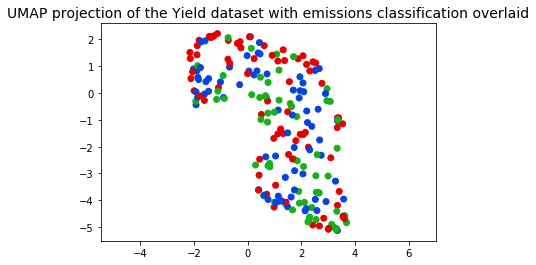

In [171]:
#Visualize 
plt.scatter(embedding2[0], embedding2[1], c=[sns.xkcd_palette(colors)[x] for x in embedding2.emissions_class.values])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Yield dataset with emissions classification overlaid', fontsize=14);

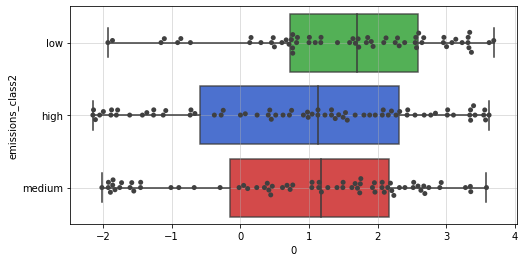

In [172]:
#Box plot x axis
fig = plt.figure(figsize = (8,4))

colors = ["green", "blue", "red"]
#cmap = sns.cubehelix_palette(rot=-.4)
ax = sns.boxplot(x=embedding2[0], y='emissions_class2', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[0], y='emissions_class2', data=embedding2, color=".25")
ax.grid(alpha=0.5)

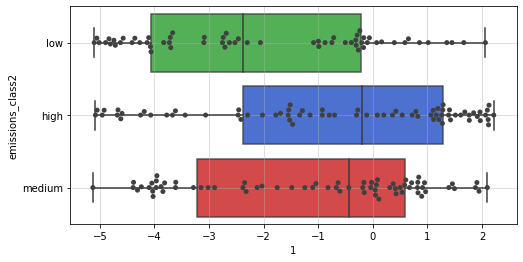

In [173]:
#Box plot y axis
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2[1], y='emissions_class2', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[1], y='emissions_class2', data=embedding2, color=".25")
ax.grid(alpha=0.5)

We can see above that considering overall emissions, there is not a very notable difference between the yield characteristics of the low, medium and high emissions groups. 

This could be interesting in itself - however, it should be noted that for yield we are only considering crops, whereas overall emissions are highly affected by agricultural practices (such as burning), as well as livestock. Therefore, in a way it makes sense that the yield of crops does not differentiate between these groups.

However, the situation may be different if we consider the emissions due to fertilizers only - let's look at this:

In [174]:
fert_emissions_2016 = total_emissions.query("item == 'Synthetic Fertilizers'").query('year == 2016').groupby('area').sum()
fert_emissions_2016.head(2)

area_code  element_code  item_code  year_code  year     value  \
area                                                                         
Afghanistan          2          7231       5061       2016  2016  623.9758   
Albania              3          7231       5061       2016  2016  276.8789   

             note    Value  Year  emissions_ha  
area                                            
Afghanistan   0.0  37910.0  2016      0.016459  
Albania       0.0   1181.7  2016      0.234306

In [175]:
#calculate the new low and medium levels
low = np.percentile(fert_emissions_2016.emissions_ha, 33.0)
medium = np.percentile(fert_emissions_2016.emissions_ha, 66.0)

In [176]:
#perform a new umap analysis
reducer_new = umap.UMAP(random_state=1)
embedding_new = reducer_new.fit_transform(yield_2016)
embedding2_new=pd.DataFrame(embedding_new)
embedding2_new=pd.merge(embedding2_new,grouped_yield_2016['Area'], left_index=True, right_index=True)
embedding2_new=pd.merge(embedding2_new,fert_emissions_2016.loc[:,['emissions_ha']],left_on='Area',right_index = True)
embedding2_new['emissions_class']=embedding2_new.emissions_ha.apply(emissions_class)
embedding2_new['emissions_class2']=embedding2_new.emissions_ha.apply(emissions_class2)
embedding2_new.head(2)

0         1         Area  emissions_ha  emissions_class  \
0  1.854531 -2.525235  Afghanistan      0.016459                0   
2  1.327653  1.611457      Albania      0.234306                1   

  emissions_class2  
0              low  
2           medium

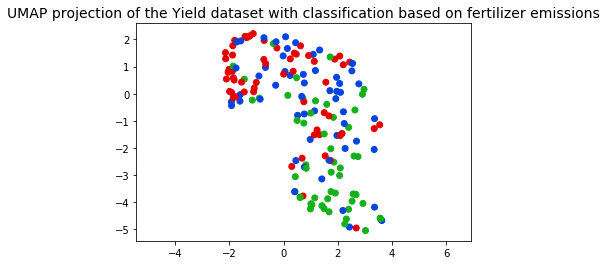

In [177]:
plt.scatter(embedding2_new[0], embedding2_new[1], c=[sns.xkcd_palette(colors)[x] for x in embedding2_new.emissions_class.values])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Yield dataset with classification based on fertilizer emissions', fontsize=14);

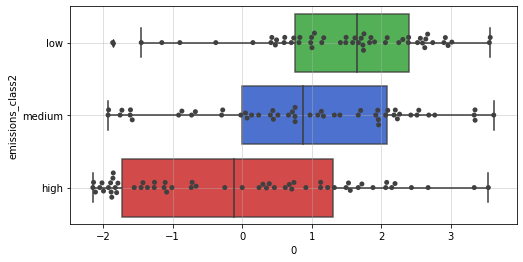

In [178]:
#Box plot x axis
fig = plt.figure(figsize = (8,4))

colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2_new[0], y='emissions_class2', data=embedding2_new, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2_new[0], y='emissions_class2', data=embedding2_new, color=".25")
ax.grid(alpha=0.5)

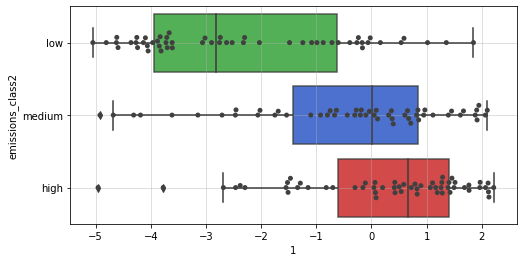

In [179]:
#Box plot y axis
fig = plt.figure(figsize = (8,4))

colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2_new[1], y='emissions_class2', data=embedding2_new, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2_new[1], y='emissions_class2', data=embedding2_new, color=".25")
ax.grid(alpha=0.5)

Looking at the plots above, we see that considering fertilizer emissions, there is a notable difference betweem the low and medium/high emissions categories when compared to the reduced dimensionality x value, and a notable difference between the low and the medium/high emissions categories when compared to the reduced dimensionality y value.


Next we want to consider further the differences and similarities between these groups.
For example, what are the differences between groups and why?
Which places are 'outliers', with similar yield characteristics but drastically different emissions, or vice versa?

Initially, we take a deeper look at these outlier cases:

For example, inspecting the "low" emissions group, we find that Australia has synthetic fertilizer emissions in the low range, but has yield characteristics more similar to that of countries with medium to high emissions such as spain:

In [180]:
embedding2_new.query("Area == ['Australia','Spain']")

0         1       Area  emissions_ha  emissions_class  \
11   0.478853  0.589596  Australia      0.018335                0   
206  0.238509  0.673006      Spain      0.241359                1   

    emissions_class2  
11               low  
206           medium

Let's take a closer look at the data we have for emissions and crop yields of these countries:

In [182]:
fert_emissions_2016.query("area == ['Australia','Spain']")

area_code  element_code  item_code  year_code  year      value  \
area                                                                        
Australia         10          7231       5061       2016  2016  6803.8569   
Spain            203          7231       5061       2016  2016  6339.4598   

           note     Value  Year  emissions_ha  
area                                           
Australia   0.0  371078.0  2016      0.018335  
Spain       0.0   26265.7  2016      0.241359

In [183]:
grouped_yield_2016.query("Area == ['Australia','Spain']")

Item       Area  Cereals (Rice Milled Eqv)  Cereals,Total  Citrus Fruit,Total  \
11    Australia                    20698.0        20752.0            199756.0   
206       Spain                    38179.0        38625.0            239620.0   

Item  Coarse Grain, Total  Fruit Primary  Pulses,Total  \
11                22375.0       142540.0       11965.0   
206               39736.0       122106.0       13873.0   

Item  Roots and Tubers,Total  Treenuts,Total  Vegetables Primary  
11                  401728.0         17488.0            258512.0  
206                 309510.0          3796.0            391402.0

Above we can see that Australia has a similar value of absolute value of emissions as well as a larger agricultural area than Spain, ultimately leading it to have a much lower value of emissions per ha of agricultural area. 

And the yield data is indeed similar, with some exceptions (notably Spain produces more grains and vegetables, and Australia produces more roots and tubers and treenuts).

### Summary of Part 4:

So far we have only looked at the year 2016. To go further, we can extend the analysis to multiple years (as was done in the yield/fertilizer application section) to see how the relationship between crop yield and fertilizer emissions has been evolving.

We can also look deeper into what causes certain countries (i.e. Australia and Spain) to have similar yields but drastically different emissions due to fertilizers, as well as further into the yield characteristics of each separate emissions group.

## Conclusion : 

Overall, we have found the interesting result that the effectiveness of fertilizer may be decreasing overtime (due to the decreasing positive correlation between fertilizer use and yield observed in parts 2 and 3), and that increased environmental impacts due to fertilizer use are not necessarily associated with "better" yields (as we can see in Part 4 for as there are certain countries which have comparable yield characteristics but very different emissions values). 

These insights will be the focus of our further analysis and final project. 


To link our observations to what is actually going on today, we have two hypotheses: 
- We have reached a saturation point in the effectiveness of fertilizer
- Fertilizer use is associated (directly or not) with degradation of soil quality so at first we can achieve higher yields with more fertilizer but overtime this can no longer be achieved

We will continue to look deeper in to this.